# GML HS 2025 - Mini-Challenge 1

**Ausgabe:** Montag, 6. Oktober 2025

**Abgabe:** Sonntag, 26. Oktober 2025, 23:59 Uhr

In [1]:
# DO NOT EDIT THIS CELL
# ADD ADDITIONAL IMOPRTS IN ASSIGNMENT CELLS

# Notebook configs
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
from IPython.display import HTML

InteractiveShell.ast_node_interactivity = "none"

## Vorgaben zu Umsetzung und Abgabe

- Der Code in diesem Notebook muss lauffähig sein bei Ausführung im Docker-Container zum Repo. Nur was durchläuft wird korrigiert.
- Es darf kein Code ausgelagert werden, i.e. sämtlicher Code muss sich im Notebook befinden. Notebooks dürfen weder umbenannt werden, noch soll die Ordnerstruktur im Repo verändert werden.
- Sämtliche Plots sind komplett beschriftet (Achsen, Labels, Überschrift, Colorbar, ..), so dass der Plot ohne den Code zu konsultieren, verstanden werden kann.
- Gib sämtliche relevanten berechneteten Grössen / Metriken mit `print`-Statements aus, e.g. `print('MAE = ', mae)`.
- Als **Abgabe** zählt der letzte Commit vor Abgabetermin in deinem Fork des Repos.  
- **Löschen, kopieren, duplizieren, splitten und verschiebe die vorhandenen Zellen nicht. Für fehlende Antwortzellen gibt es keine Punkte.** Du darfst beliebig viele weitere Zellen hinzufügen (nur via **insert new cell**).
- Laufzeit des Notebooks: Das Notebook sollte in weniger als 30 Minuten ausgeführt werden können.

Für die Erarbeitung der Lösung darf unter Studierenden zusammengearbeitet werden.  
Die Zusammenarbeit ist dabei aber auf konzeptionelle und algorithmische Fragen und Verständnisaspekte beschränkt.  

**Es darf kein Code oder Text kopiert werden, weder vom Internet noch von Mitstudierenden.**

**ChatGPT und ähnliche Sprachmodelle dürfen im Dienst des eigenen Verständnisgewinns beim Lösen der Mini-Challenge verwendet werden. Es dürfen aber keine Lösungen gesamthaft übernommen werden. Zudem muss die gesamte Lösung, Zeile für Zeile und im gesamten Zusammenhang der Aufgabenstellung (in der Defense) erklärt werden können.** 

Beim Vorfinden von kopiertem Code werden alle betroffenen Aufgaben von allen Beteiligten mit 0 Punkten bewertet.


#### Python Module

Neben der Python Standard Library darfst du die folgenden Module immer benutzen: `numpy`, `pandas`, `matplotlib`, `seaborn` (für Progress-Bars).

Du darfst auch generell [sklearn.preprocessing](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing), [sklearn.model_selection](https://scikit-learn.org/stable/model_selection.html), [sklearn.pipeline](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.pipeline) und [sklearn.compose](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.compose) verwenden.

Zusätzliche Module darst du nur verwenden wenn dies ausdrücklich erwähnt oder bereits vorgegeben ist in einer Code-Cell.

### Bewertung

Bewertet wird:

- Vollständigkeit (Code, Text)
- Korrektheit (Code, Text)
- Implementation (z.B. Vektorisierung der Operationen, Scikit-Learn API, Visualisierungen, Lesbarkeit Code/Output)

## Einleitung

Du arbeitest mit mit Biologen zusammen, die einen Datensatz von Pinguinen gesammelt haben und dich bitten, diesen für sie zu untersuchen. Die Biologen möchten das Gewicht (`body_mass_g`) der Pinguine schätzen können auf Basis der anderen Variablen, die im Feld leichter und schneller gemessen werden könnnen.

Der Datensatz heisst `penguins.csv` und er liegt in diesem Verzeichnis. Kopiere den Datensatz in dein `/data`-Verzeichnis und lade jeweils von da.

## Aufgabe 1 (8 Punkte)

Bevor man einen Datensatz modelliert ist es wichtig diesen zu untersuchen und kennenzulernen. Benutze deine EDA-Kenntnisse, um die Daten einzulesen, zu visualisieren und zu beschreiben (im Sinne der deskriptiven Statistik).

Unternimm folgende Schritte:
    
- Lies den Datensatz ein und verschaffe dir einen Überblick.
- Berechne und zeige wichtige Kennzahlen.
- Visualisiere jede Variable mit einem sinnvollen Plot. Berücksichtige dabei die Fragestellung.
- Nimm allenfalls Datensäuberungsschritte vor und dokumentiere diese sorgfältig.

Versuche durch diese Explorative Datenanalyse abzuschätzen, wie gut die Vorhersage gelingen könnte, welche Variablen wichtig sein könnten und wie man Variablen allenfalls präprozessieren muss.

In [2]:
# CODE ANTWORTZELLE
import pandas as pd

df = pd.read_csv("./data/penguins.csv")  # Laden des Datensatzes

# Kerninformationen über den DataFrame ausgeben
print(df.info())
print()
print(df.head())
print()
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB
None

  species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen              39.1             18.7              181.0   
1  Adelie  Torgersen              39.5             17.4              186.0   
2  Adelie  Torgersen              40.3             18.0              195.0   
3  Adelie  Torgersen               NaN              NaN                NaN   
4  Adelie  Torg

In [3]:
# Anzahl der fehlenden Werte pro Spalte
print(df.isnull().sum())

# Zeilen mit fehlenden Werten ausgeben
print(df[df.isnull().any(axis=1)])

# Entfernen von Zeilen mit fehlenden Werten
df_cleaned = df.dropna()

# Bei der Kategorie sex gibt es noch weitere Werte die als "." kodiert sind. Diese Zeilen werden entfernt.
print(df_cleaned["sex"].value_counts())
df_cleaned = df_cleaned[df_cleaned["sex"] != "."]

# Reindexing des DataFrames nach dem Entfernen von Zeilen
df_cleaned.reset_index(drop=True, inplace=True)

print("Anzahl Duplikate:", df_cleaned.duplicated().sum())

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64
    species     island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
3    Adelie  Torgersen               NaN              NaN                NaN   
8    Adelie  Torgersen              34.1             18.1              193.0   
9    Adelie  Torgersen              42.0             20.2              190.0   
10   Adelie  Torgersen              37.8             17.1              186.0   
11   Adelie  Torgersen              37.8             17.3              180.0   
47   Adelie      Dream              37.5             18.9              179.0   
246  Gentoo     Biscoe              44.5             14.3              216.0   
286  Gentoo     Biscoe              46.2             14.4              214.0   
324  Gentoo     Biscoe              47.3             13.8              216.0   
339  Gentoo     Bis

### Univariate Analyse

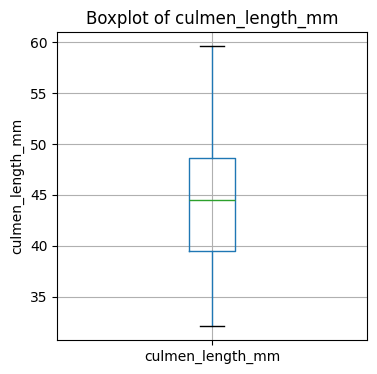

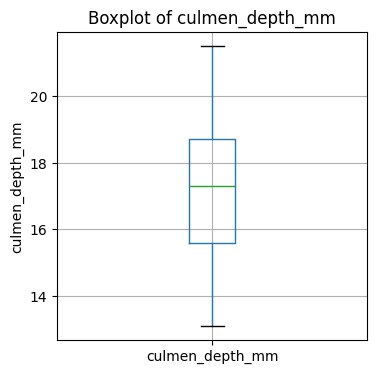

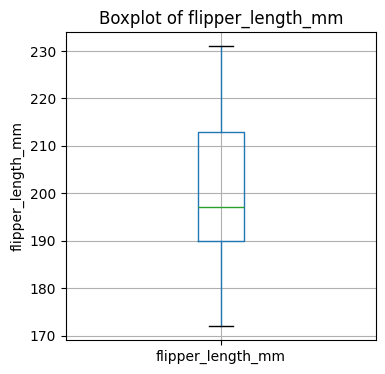

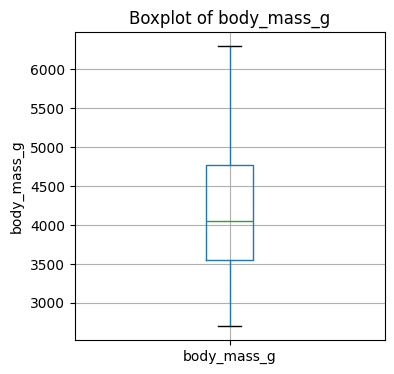

In [4]:
# Erstellen von Boxplots für jede numerische Spalte
import matplotlib.pyplot as plt

numeric_cols = df_cleaned.select_dtypes(include=["float64", "int64"]).columns
for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    df_cleaned.boxplot(column=col)
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

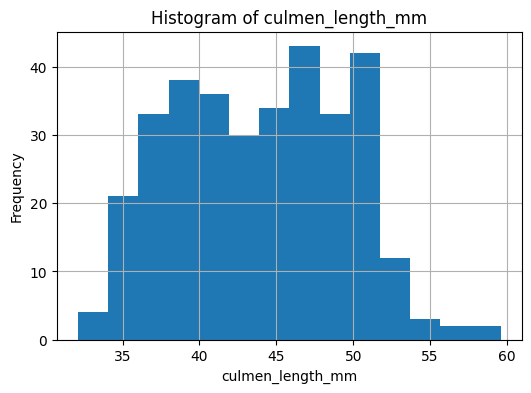

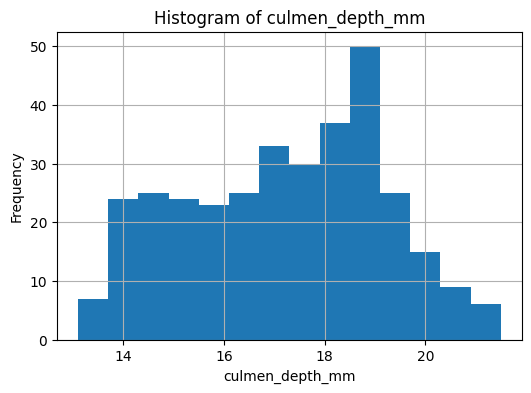

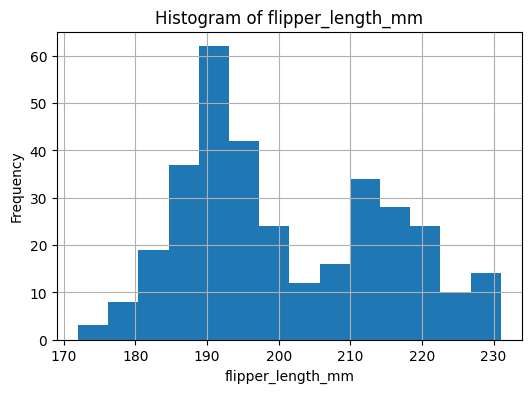

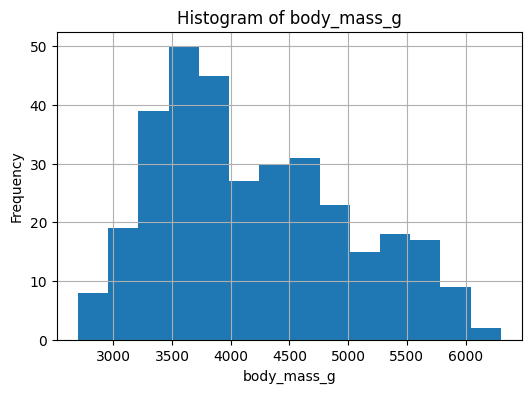

In [5]:
# Erstellen eines Histrogramms für Nummerische Spalten
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df_cleaned[col].hist(bins="rice")  # Rice Rule für die Anzahl der Bins
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

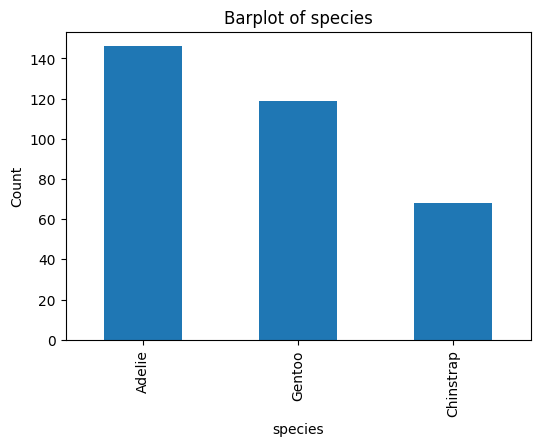

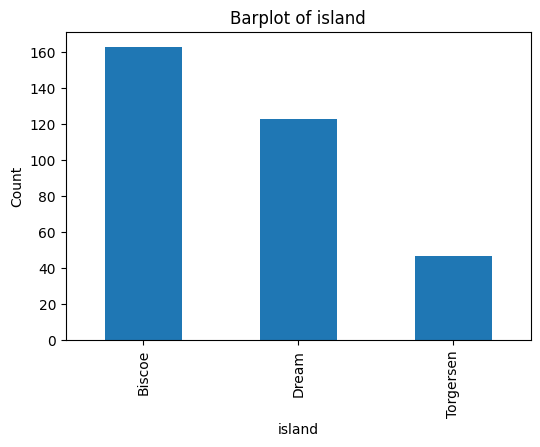

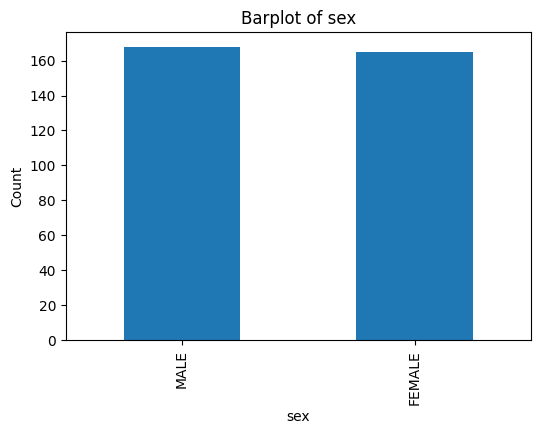

In [6]:
# Erstellen von Barplots für kategoriale Spalten
categorical_cols = df_cleaned.select_dtypes(include=["object", "category"]).columns
for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    df_cleaned[col].value_counts().plot(kind="bar")
    plt.title(f"Barplot of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

### Multivariate Analyse

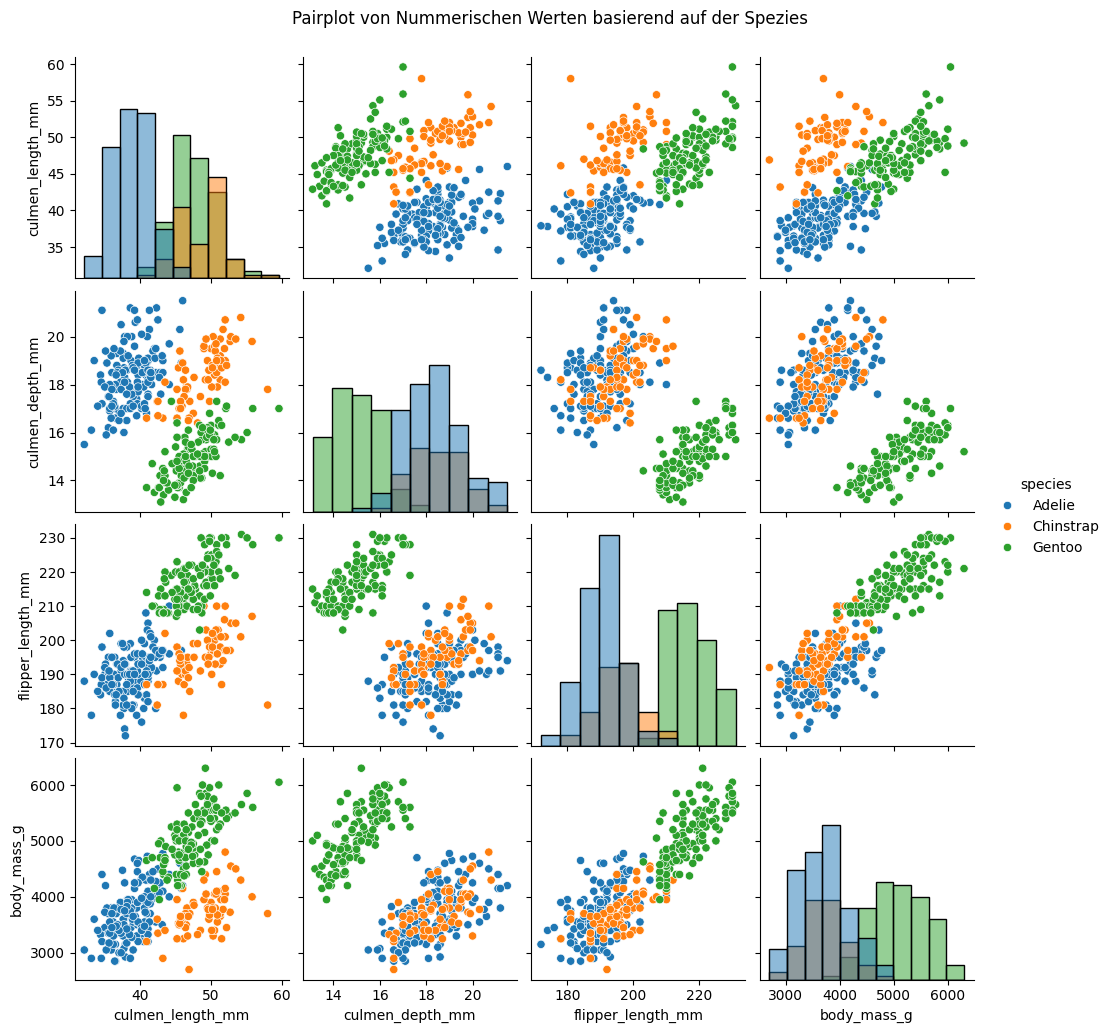

In [7]:
import seaborn as sns

# Erstellen eines Paarplots für numerische Spalten.
sns.pairplot(df_cleaned, hue="species", diag_kind="hist")
plt.suptitle("Pairplot von Nummerischen Werten basierend auf der Spezies", y=1.03)
plt.show()

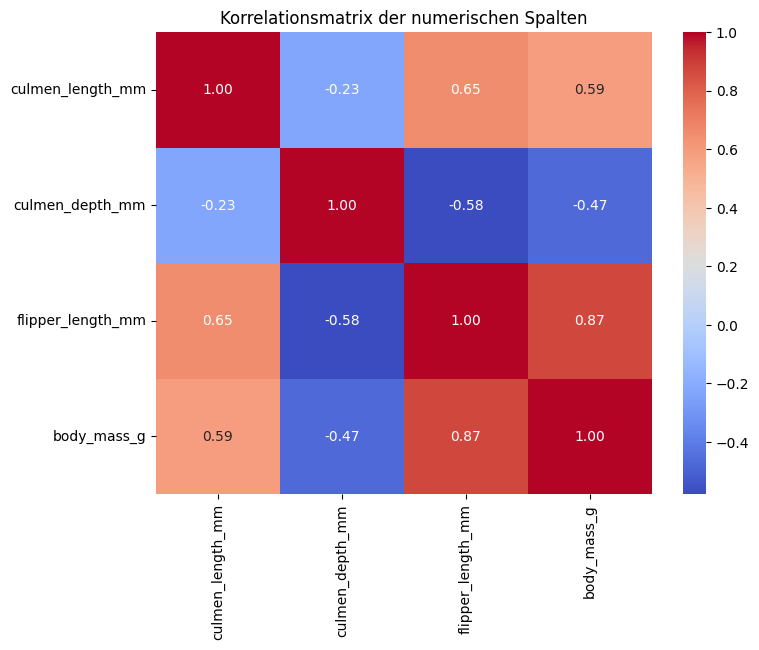

In [8]:
# Erstellen einer Korrelationsmatrix für numerische Spalten
correlation_matrix = df_cleaned[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korrelationsmatrix der numerischen Spalten")
plt.show()

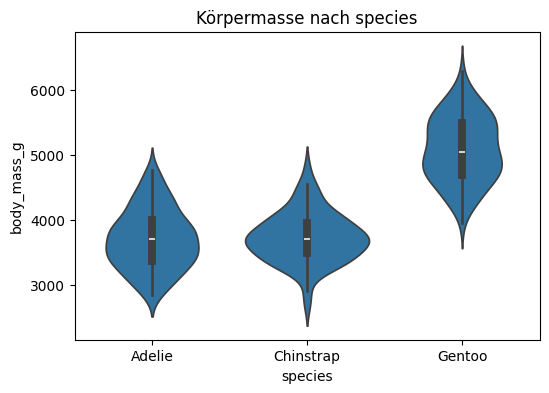

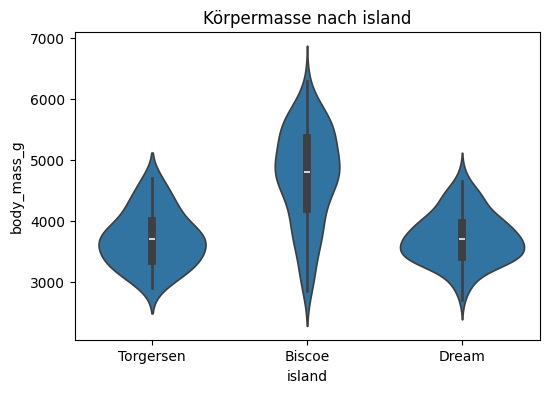

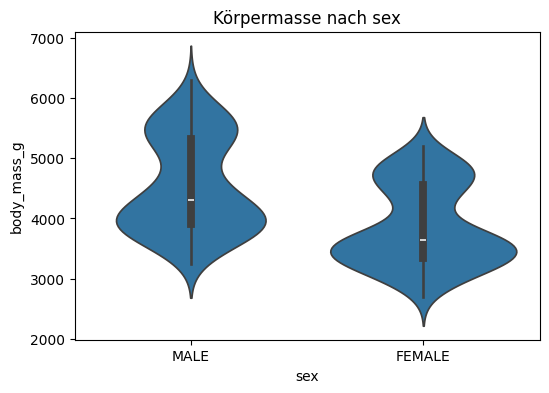

In [9]:
# Boxplot der Körpermasse nach Kategorien

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x=col, y="body_mass_g", data=df_cleaned)
    plt.title(f"Körpermasse nach {col}")
    plt.show()

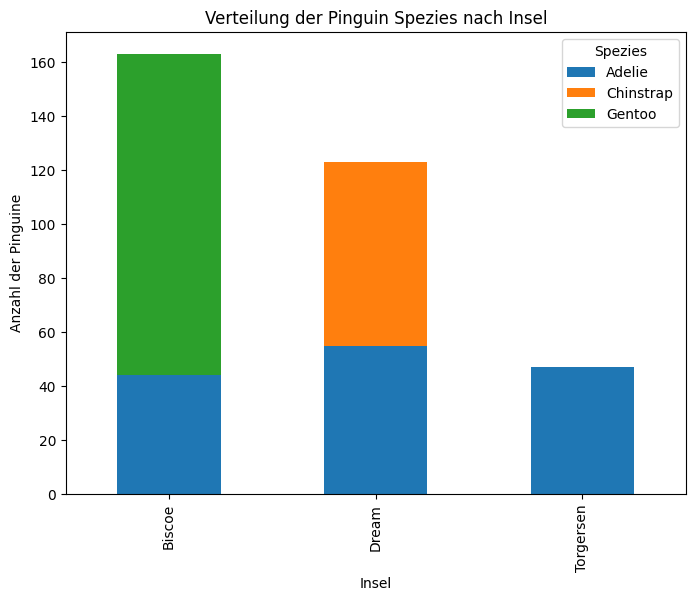

In [10]:
# Gruppierung von Pinguin Spezies nach Island
grouped_island = df_cleaned.groupby("island")["species"].value_counts().unstack()
grouped_island.plot(kind="bar", stacked=True, figsize=(8, 6))
plt.title("Verteilung der Pinguin Spezies nach Insel")
plt.xlabel("Insel")
plt.ylabel("Anzahl der Pinguine")
plt.legend(title="Spezies")
plt.show()

Diskutiere deine Einsichten zu den Daten und zum Vorhersagevorhaben für die Zielgrösse auf Basis deiner Explorativen Datenanalyse.

(Es folgt eine Textantwortzelle. Nicht löschen.)

YOUR ANSWER HERE

**Datensäuberung**
- Der Datensatz hat beim Laden die Dimension (344x7). Nach dem entfernen von den NA und den "." - Werten in der Spalte "sex" ist die Dimension des gesäuberten DataFrames (333x7).
  - Die NA Werte machen ca. 3.2% des Datensatzes aus. Ich habe mich entschieden die NA Werte zu entfernen, da es sich um einen kleinen Anteil handelt und das entfernen die Analyse vereinfacht. Eine Imputation der NA Werte wäre ebenfalls möglich gewesen. Jedoch habe ich empfunden, dass dies den Datensatz unnötig verkompliziert.
- Es befinden sich keine Ausreisser in dem Datensatz
- Es befinden sich keine Duplikate in dem Datensatz

**Verteilungen**
- ```species```: Von Adelie Pinguinen gibt es am meisten, gefolgt von Gentoo und danach Chinstrap Pinguinen.
- ```island```: Am meisten Pinguine leben auf der Insel Biscoe, gefolgt von Dream. Weniger leben auf Torgersen.
- ```culmen_length_mm```: Leicht Bimodale Verteilung.
- ```culmen_depth_mm```: Multimodal mit Hauptpeak bei ca. 19mm.
- ```flipper_length_mm```: Bimodale Verteilung mit Peaks bei ca. 190mm und 215mm.
- ```body_mass_g```: Rechtsschiefe Verteilung mit einem Peak bei ca. 3600 gramm.
- ```sex```: Gleichverteilung zwischen männlichen und weiblichen Pinguinen.

**Abhängigkeiten**
- ```body_mass_g x culmen_length_mm```: Hat eine leicht positive Korrelation (**corr=0.57**). Durch den Pairplot lässt sich erkennen, dass die Spezien kleine Clusters bilden. Chinstrap haben im Schnitt die längsten Schnäbel, sind jedoch ca. gleich schwer wie die Adelie Pinguine. Gentoo Pinguine sind im Schnitt in der Mitte von der SChnabellänge, jedoch die schwersten.
- ```body_mass_g x culmen_depth_mm```: Haben eine leicht negative Korrelation (**corr=-0.47**). Durch den Pairplot lässt sich erkennen, dass 2 Clusters gebildet werden. Gentoo Pinguine haben im Schnitt die kleinste Schnabel breite und sind die schwersten. Adelie und Chinstrap Pinguine haben im Schnitt einen breiteren Schnabel, sind jedoch leichter.
-  ```body_mass_g x flipper_length_mm```: Es besteht eine starke positive Korrelation (**corr=0.87**). Durch den Pairplot lässt sich erkennen, dass die Spezie Gentoo im Schnitt längere Flossen hat und schwerer ist als die anderen beiden Spezien. 
-  ```body_mass_g x species```: Aus dem Violinenplot "Körpermasse nach species" lässt sich erkennen, dass die Spezie Gentoo im Schnitt die höchste Körpermasse hat. Die Spezien Adelie und Chinstrap haben im Schnitt eine ähnliche Körpermasse.
-  ```body_mass_g x island```: Aus dem Violinenplot "Körpermasse nach island" lässt sich erkennen, dass die Pinguine auf der Insel Biscoe im Schnitt die höchste Körpermasse haben. Jedoch ist die Varianz der Körpermasse auf der Insel Biscoe auch am höchsten. Die Pinguine auf der Insel Torgersen haben im Schnitt die kleinste Körpermasse. Auf den Inseln Dream und Torgersen haben die Pinguine eine ähnliche Körpermasse (kleine Varianz). 
   -  Der Grund dafür ist, dass auf der Insel Biscoe alle Gentoo Pinguine leben, welche im Schnitt die höchste Körpermasse haben.
   -  Alle Chinstrap Pinguine leben auf der Insel Dream.
   -  Die Spezies Adelie lebt auf allen drei Inseln. Sie sind jedoch die einzigen Pinguine auf der Insel Torgersen.
-  ```body_mass_g x sex```: Aus dem Violinenplot "Körpermasse nach sex" lässt sich erkennen, dass männliche Pinguine im Schnitt eine höhere Körpermasse haben als weibliche Pinguine. Die beiden Verteilungen sind bimodal. 

**Vorhersage bezüglich des Model**
- Durch den plot "Korrelationsmatrix der numerischen Spalten" erkennt man, dass die Variable ```flipper_length_mm``` die höchste Korrelation mit der Zielgrösse ```body_mass_g``` hat. Diese Variable sollte auf jeden Fall im Model verwendet werden.
- Das Feature ```sex``` hat ebenfalls einen Einfluss auf die Zielgrösse ```body_mass_g```. Dieses Feature sollte ebenfalls im Model verwendet werden.
- Das Feature ```species``` hat den grössten Einfluss auf die Zielgrösse ```body_mass_g```. Dieses Feature sollte auf jeden Fall im Model verwendet werden.
- Das Feature ```island``` hat keinen direkten Einfluss auf die Zielgrösse ```body_mass_g```. Viele informationen können auch aus der ```species``` entnommen werden. 

## Aufgabe 2 (15 Punkte)

In dieser Aufgabe implementieren und validieren wir ein _Ridge Regression_-Modell.

### Ridge Regression

Ridge Regression ist eine regularisierte Form ($l_2$-Regularisierung) der Ordinary Least Squares (OLS) Kostenfunktion für die lineare Regression.  

Die Ridge Regression-Kostenfunktion $J(\mathbf{w})$ für einen Datensatz $\cal{D}=\{(\mathbf{x}^{(1)}, y^{(1)}), \dots, (\mathbf{x}^{(n)}, y^{(n)}) \}$ mit $n$ Datenpunkten ist:

\begin{align}
J(\mathbf{w}) &= \frac{1}{2n}\sum_{i=1}^n (y^{(i)} - \mathbf{x}^{(i)T}\mathbf{w})^2 + \frac{1}{2}\lambda \sum_{j=1}^p w_j^2 
\end{align}

Der $i$-te Datenpunkt $\mathbf{x}^{(i)}$ ist ein Vektor der Dimensionalität $\mathbb{R}^{p +1}$: $\mathbf{x}^{(i)} = \Big(1, x_1^{(i)}, \dots , x_p^{(i)}\Big)$.

$\mathbf{w} = (w_0, \dots, w_p)$ sind dabei die Modellkoeffizienten, $\lambda$ ist die Regularisierungsstärke.


**Beachte:**

- In `sklearn` wird statt $\lambda$ jeweils $\alpha$ (`alpha`) als Bezeichnung für die Regularisierungsstärke verwendet (weil `lambda` ein reserviertes Wort ist in Python).
- Um im Folgenden Gradient Descent für die obige Kostenfunktione umzusetzen, musst du diese ableiten.
- Implementiere alles vektorisiert.

### Gradient Descent Varianten

Bei _Batch Gradient Descent (BGD)_ berechnet man den Gradienten der Kostenfunktion bezüglich der Modellparameter für jeden _Gradient Descent Step_ mit **allen Datenpunkten**. Damit berechnet man den Gradient exakt bei gegebenem Datensatz. Man kann den Gradienten jedoch auch mit einem Subset der Datenpunkte approximieren. Dadurch verringert sich der Rechenaufwand. Mit _Stochastic Gradient Descent (SGD)_ nimmt man nur **einen, zufällig ausgewählten, Datenpunkt** (deshalb _stochastic_) um den Gradienten zu schätzen. Man iteriert dabei in zufälliger Reihenfolge wiederholt (Epoche) durch alle Datenpunkte. Oft verwendet man **[learning rate decay](https://en.wikipedia.org/wiki/Learning_rate#Learning_rate_schedule)**. Setze für SGD einen *Time-based Schedule* um.

Implementiere die Optionen `optimization_method="bgd"` und `optimization_method="sgd"` um das Modell wahlweise mit _BGD_ oder _SGD_ zu optimieren. 

### Normalengleichung

Mit der Normalengleichung lässt sich eine analytisch exakte Lösung für ein regularisiertes Least Squares Problem berechnen:

\begin{equation}
\hat{\mathbf{w}} = (\mathbf{X}^T\mathbf{X} + \lambda \mathbf{1}_{neq})^{-1}\mathbf{X}^T \mathbf{y}
\end{equation}

Füge auch für die Normalengleichung auch noch Optimierungsoption `optimization_method="normalequation"` hinzu.

Die Matrix $(\mathbf{X}^T\mathbf{X} + \lambda \mathbf{1}_{neq})$ ist für $\alpha > 0$ **immer** invertierbar. Verwende zum Invertieren die numpy-Funktion `np.linalg.pinv`.

$\mathbf{1}_{neq}$ ist hier eine Diagonalmatrix der Dimension $(p + 1 \times p + 1)$ mit $1$-en auf der Diagonalen ausser an der Position $(0,0)$ (oben links), welche $0$ gesetzt wird, genauso wie sämtliche Offdiagonalelemente.

Ergänze die untenstehende Klasse und deren Methoden. Folge der Scikit-Learn API ([Link](https://scikit-learn.org/stable/developers/develop.html)): Das bedeutet im Wesentlichen, dass du die Methoden implementieren sollst, die in der Klasse schon vorgegeben sind.

Beachte die in den Doc-Strings spezifizierten Angaben, insbesondere auch die der Shapes der Inputs und Outputs der einzelnen Methoden.

In [11]:
from tabnanny import verbose
from typing import Self

import numpy as np
from sklearn.base import BaseEstimator
from tqdm.notebook import tqdm


class RidgeRegression(BaseEstimator):
    """Ridge Regression

    Args:
    -----
        epsilon: if norm of gradient falls below epsilon,
            gradient descent terminates (disable with negative values)
        max_num_steps: max number of steps for gradient descent
        learning_rate: learning rate for gradient descent
        optimization_method: one of 'bgd' (batch gradient descent),
            'sgd' (stochastic gradient descent)
        alpha: regularization strength (lambda)
        verbose: whether to print progress during model training (optional)
    """

    def __init__(
        self,
        epsilon: float = -1,
        max_num_steps: int = 1000,
        learning_rate: float = 0.1,
        optimization_method: str = "bgd",
        alpha: float = 0.0,
        verbose: bool = True,
        decay: float = 0.0,  # Lernrate decay für SGD
    ):
        self.alpha = alpha
        self.epsilon = epsilon
        self.max_num_steps = max_num_steps
        self.learning_rate = learning_rate
        self.optimization_method = optimization_method
        self.verbose = verbose
        self.decay = decay  # Lernrate decay für SGD

    def fit(self, X: np.ndarray, y: np.ndarray) -> Self:
        """Fit the model coefficients.
        Args:
            X: input data (n, p)
            y: input labels (n, )

        Attributes>
            w_: model coefficients as 1d array, including bias weight w_0

        Returns:
            self
        """
        # YOUR CODE HERE
        # Überprüfen ob X und y die richtigen Dimensionen haben
        assert X.ndim == 2, "x muss zweidimensional sein, z.B. shape (n, p)"
        assert y.ndim == 1, "y muss eindimensional sein, z.B. shape (n, )"
        assert (
            X.shape[0] == y.shape[0]
        ), "Anzahl Datenpunkte in X und y muss übereinstimmen"

        # Überprüfen ob die erste Spalte von X nur aus 1en besteht (für den Bias-Term)
        X = self._add_bias(X)

        match self.optimization_method:
            case "bgd":
                """
                Ich implementiere BGD (Batch Gradient Descent) mittels:
                - einer konstanten Lernrate (keine Learning Rate Decay)
                - Berechnung des Gradienten über den gesamten Trainingsdatensatz pro Iteration
                - Pre-Update Konvergenzprüfung: Der Gradient wird berechnet und geprüft, bevor die Gewichte aktualisiert werden
                - Optional: Verbose-Ausgabe alle 100 Schritte zur Überwachung des Trainingsfortschritts

                BGD unterscheidet sich von SGD dadurch, dass:
                - Der Gradient exakt über alle n Datenpunkte berechnet wird (keine stochastische Approximation)
                - Die Konvergenz deterministisch ist (gleiche Initialisierung → gleiche Lösung)
                """
                weights = np.zeros(X.shape[1])  # Initialisieren der Gewichte mit Nullen

                for step in range(self.max_num_steps):

                    # 1. Berechnung des Gradienten
                    self.w_ = weights
                    gradient = self.gradient(X, y)

                    # 2. Überprüfen ob der Gradient kleiner als epsilon ist (pre update)
                    if self.epsilon > 0 and np.linalg.norm(gradient) < self.epsilon:
                        if self.verbose:
                            print(
                                f"Converged after {step} steps (||grad||={np.linalg.norm(gradient):.6f}). Final cost: {self.cost(X, y):.6f}"
                            )
                        break

                    # 3. Update der Gewichte
                    weights -= self.learning_rate * gradient

                    # 4. Ausgabe des Fortschritts wenn verbose=True
                    if self.verbose and step % 100 == 0:
                        cost_val = self.cost(X, y)
                        grad_norm = np.linalg.norm(gradient)
                        print(
                            f"Step {step:5d} | Cost: {cost_val:.6f} | ||grad||: {grad_norm:.6f}"
                        )
                else:
                    if self.verbose:
                        print(
                            f"Reached max steps ({self.max_num_steps}). Final cost: {self.cost(X, y):.6f} | ||grad||={np.linalg.norm(gradient):.6f}"
                        )

                # Gewichte final speichern
                self.w_ = weights

            case "sgd":
                """
                Ich implementiere SGD mittels
                - einer Konstanten Lernrate.
                - und dem Polyak–Ruppert Averaging für die Gewichte. (8.4.4 Iterate averaging, Murphy, K. (2022))
                - und einer Mini-Batch Grösse von 100 (oder kleiner, wenn n < 100) (8.5.2.3 SGD compared to batch learning, Murphy, K. (2012)) Bei dem Standart SGD wäre die Mini-Batch Grösse 1
                - und einer zufälligen Permutation der Daten pro Step ohne zurücklegen (8.5.2.3 SGD compared to batch learning, Murphy, K. (2012))

                Damit SGD korrekt funktioniert musste mehramls w_avg in self.w_ abgespeichert werden, um den Gradienten auf den gemittelten Gewichten zu berechnen, danach ursprüngliche Werte wiederherstellen
                Wenn dies nicht gemacht wird würde das Traning auf die gemittelten Gewichte optimieren, was nicht korrekt ist.
                """

                # Zufallsgenerator (statt globalem seed)
                rng = np.random.default_rng(42)

                n = X.shape[0]
                batch_size = min(100, n)  # Mini-Batch-Grösse (reines SGD waere 1)
                num_batches_per_step = int(np.ceil(n / batch_size))

                # Startwerte
                weights = np.zeros(X.shape[1])
                w_avg = np.zeros_like(weights)
                t_updates = 0  # Zähler für Polyak–Ruppert

                for step in range(self.max_num_steps):
                    # 1) Shuffle pro Step
                    perm = rng.permutation(n)
                    X_shuffled = X[perm]
                    y_shuffled = y[perm]

                    # 2) Mini-Batch-Schleife
                    for b in range(num_batches_per_step):
                        start = b * batch_size
                        end = min(start + batch_size, n)
                        X_batch = X_shuffled[start:end]
                        y_batch = y_shuffled[start:end]

                        # Aktuelle Gewichte an gradient übergeben
                        self.w_ = weights
                        grad = self.gradient(X_batch, y_batch)

                        # Lerning rate decay: Time based schedule
                        eta_t = self.learning_rate / (1.0 + self.decay * t_updates)

                        # Parameter-Update
                        weights = weights - eta_t * grad

                        # Polyak–Ruppert (Iterate Averaging)
                        t_updates += 1
                        if t_updates == 1:
                            w_avg = weights.copy()
                        else:
                            w_avg += (
                                weights - w_avg
                            ) / t_updates  # 8.4.4 Iterate averaging, Murphy, K. (2022)

                    # 3) Stepweises Logging und Konvergenzcheck
                    if self.verbose and step % 100 == 0:
                        _old = (
                            self.w_
                        )  # Für die Kommentare auf den gemittelten Gewichten auswerten
                        self.w_ = w_avg
                        cost_val = self.cost(X, y)
                        # Gradienten-Norm
                        grad_full = self.gradient(X, y)
                        grad_norm = np.linalg.norm(grad_full)
                        print(
                            f"Step {step:5d} | Cost: {cost_val:.6f} | ||grad||: {grad_norm:.6f}"
                        )
                        self.w_ = _old

                    # Konvergenzprüfung: norm des vollen gradienten auf w_avg
                    if self.epsilon > 0:
                        _old = self.w_
                        self.w_ = w_avg
                        grad_full = self.gradient(X, y)
                        self.w_ = _old
                        if np.linalg.norm(grad_full) < self.epsilon:
                            if self.verbose:
                                print(
                                    f"Converged after {step} steps "
                                    f"(||grad||={np.linalg.norm(grad_full):.6f}). "
                                    f"Final cost: {self.cost(X, y):.6f}"
                                )
                            break
                else:
                    if self.verbose:
                        # Finale ausgabe
                        _old = self.w_
                        self.w_ = w_avg
                        print(
                            f"Reached max steps ({self.max_num_steps}). "
                            f"Final cost: {self.cost(X, y):.6f} | "
                            f"||grad||={np.linalg.norm(self.gradient(X, y)):.6f}"
                        )
                        self.w_ = _old

                # Finale Gewichte: das Iterate-Average
                self.w_ = w_avg
            case "normalequation":
                """
                Ich verwende für die Normalengleichung folgende Formel: $\hat{\mathbf{w}}_{\text{ridge}} = (\lambda I_D + X^T X)^{-1} X^T y$. Ich habe mir überlegt mit SVD zu arbeiten,jedoch macht es in diesem Anwendungsbeispiel
                keinen Sinn, da die anzahl Features deutlich kleiner ist als die Anzahl Datenpunkte. Abschnitt 7.5.2 (Numerically stable computation), Murphy, K. P. (2012). Machine Learning: A Probabilistic Perspective. The MIT Press.
                """

                einheitsmatrix = np.eye(X.shape[1])
                einheitsmatrix[0, 0] = 0  # Kein Bias regularisieren
                weights = (
                    np.linalg.pinv(X.shape[0] * self.alpha * einheitsmatrix + X.T @ X)
                    @ X.T
                    @ y
                )  # Normalengleichung für Ridge Regression Abgeleitet von der Normalengleichung der J(w). Der Faktor N wird hinzugefügt, da die Kostenfunktion J(w) den Faktor 1/2N enthält.

                if verbose:
                    print(weights)

                self.w_ = weights
            case _:
                raise ValueError(
                    f"Unknown optimization method: {self.optimization_method}"
                )

        return self

    def gradient(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Calculate Gradient of Cost Function.

        Calculates dJ/dw, while w are the current parameter estimates in self.w_

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            dJ/dw gradient vector (p + 1, )
        """
        # YOUR CODE HERE
        X = self._add_bias(X)  # Sicherstellen, dass X eine Bias-Spalte hat

        reg = np.r_[
            0, np.ones(X.shape[1] - 1)
        ]  # Regularisierung: 0 für Bias, 1 für alle anderen Gewichte

        """
        "By penalizing the sum of the magnitudes of the weights, we ensure the function is simple
        (since w = 0 corresponds to a straight line, which is the simplest possible function,
        corresponding to a constant).", Murphy (2012, p. 227)
        """

        gradient = 1 / X.shape[0] * X.T @ (X @ self.w_ - y) + self.alpha * reg * self.w_

        assert gradient.ndim == 1
        return gradient

    def cost(self, X: np.ndarray, y: np.ndarray) -> float:
        """Evaluate the Cost Function.

        Args:
            X: input data (n, p)
            y: input labels (n, )

        Returns:
            total cost
        """
        # YOUR CODE HERE
        X = self._add_bias(X)  # Sicherstellen, dass X eine Bias-Spalte hat

        # Bei der Matrixmultiplikation muss X mit w_ multipliziert werden, nicht X.T, weil w_ ein Spaltenvektor ist. Würde man X.T verwenden, gäbe es einen Dimensionenfehler ((p+1, n) @ (p+1,)).
        cost = 1 / (2 * X.shape[0]) * np.sum(
            (y - X @ self.w_) ** 2
        ) + 1 / 2 * self.alpha * np.sum(self.w_[1:] ** 2)

        assert isinstance(cost, float)
        return cost

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Calculate Predictions.

        Args:
            X: input Data (n, p)

        Returns:
            Predictions (n, )
        """
        # YOUR CODE HERE
        X = self._add_bias(X)  # Sicherstellen, dass X eine Bias-Spalte hat
        predictions = X @ self.w_

        assert predictions.ndim == 1
        return predictions

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """Calculate R^2

        See: https://en.wikipedia.org/wiki/Coefficient_of_determination

        Args:
            X: Input Data (n, p)
            y: Input Labels (n, )

        Returns:
            R^2
        """
        # YOUR CODE HERE
        residuals = y - self.predict(X)
        ss_res = residuals @ residuals
        ss_tot = (y - np.mean(y)) @ (y - np.mean(y))
        score = 1 - ss_res / ss_tot

        assert isinstance(score, float)
        return score

    def _add_bias(self, X: np.ndarray) -> np.ndarray:
        """Prüft ob die erste Spalte von X nur aus 1en besteht (für den Bias-Term).
        Falls nicht, wird eine Spalte mit 1en am Anfang von X hinzugefügt.

        Args:
            X (np.ndarray): Eingabedaten (n, p)

        Returns:
            np.ndarray: Gibt X mit Bias-Spalte zurück.
        """
        if X.shape[1] == 0 or not np.allclose(X[:, 0], 1.0):
            return np.column_stack((np.ones(X.shape[0]), X))
        return X

Die folgende Zelle enthält verschiedene Tests die deine Implementierung prüfen. Sorge dafür, dass diese Tests erfolgreich sind. Stelle sicher, dass die Input-Shapes der Methoden den Doc-Strings entsprechen.

**Achtung: Die Tests decken nicht alles ab. Du kannst also nicht davon ausegehen, dass deine Implementierung korrekt ist sobald die Tests erfolgreich sind.**

Deine Abgabe wird noch mit weiteren, für dich nicht sichtbaren Tests, geprüft.

In [12]:
# TEST CELL

from sklearn.datasets import make_regression


def print_result(test_name, passed, expected, actual):
    status = "Passed" if passed else "Failed"
    print(f"{status} test: {test_name}")
    print(f"----> Expected: {expected}")
    print(f"----> Actual: {actual}")


def run_test_multivariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=2, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), w_true])

    rr = RidgeRegression(
        alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1
    )
    rr.fit(Xdummy, ydummy)

    try:
        np.testing.assert_allclose(w_true, rr.w_, atol=1e-3)
        print_result("run_test_multivariate", True, w_true, rr.w_)
    except AssertionError:
        print_result("run_test_multivariate", False, w_true, rr.w_)


def run_test_univariate():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])

    rr = RidgeRegression(
        alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1
    )
    rr.fit(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(w_true, rr.w_, atol=1e-3)
        print_result("run_test_univariate", True, w_true, rr.w_)
    except AssertionError:
        print_result("run_test_univariate", False, w_true, rr.w_)


def run_test_score():
    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    rr = RidgeRegression(
        alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1
    )
    rr.fit(Xdummy, ydummy)
    score = rr.score(Xdummy, ydummy)
    expected_score = 1.0

    try:
        np.testing.assert_almost_equal(score, expected_score, decimal=3)
        print_result("run_test_score", True, expected_score, score)
    except AssertionError:
        print_result("run_test_score", False, expected_score, score)


def run_test_cost():
    Xdummy, ydummy, _ = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    rr = RidgeRegression(
        alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1
    )
    rr.fit(Xdummy, ydummy)
    actual_cost = rr.cost(Xdummy, ydummy)
    expected_cost = 1e-6

    try:
        assert actual_cost < expected_cost
        print_result("run_test_cost", True, f"< {expected_cost}", actual_cost)
    except AssertionError:
        print_result("run_test_cost", False, f"< {expected_cost}", actual_cost)


def run_test_gradient():

    Xdummy, ydummy, w_true = make_regression(
        n_samples=30, bias=5.0, coef=True, n_features=1, n_targets=1, random_state=123
    )
    w_true = np.concatenate([np.array([5.0]), np.array([w_true])])

    rr = RidgeRegression(
        alpha=0, epsilon=1e-3, optimization_method="bgd", learning_rate=0.1
    )
    rr = rr.fit(Xdummy, ydummy)

    expected_gradient = np.array([-6.92655851, -59.01320294])
    weights = np.array([0.0, 0.0])
    rr.w_ = weights
    actual_gradient = rr.gradient(Xdummy, ydummy)
    try:
        np.testing.assert_allclose(actual_gradient, expected_gradient)
        print_result("run_test_gradient", True, expected_gradient, actual_gradient)
    except AssertionError:
        print_result("run_test_gradient", False, expected_gradient, actual_gradient)


for test in [
    run_test_multivariate,
    run_test_univariate,
    run_test_score,
    run_test_cost,
    run_test_gradient,
]:
    try:
        test()
    except Exception as e:
        print(f"Error during testing - test: {test} error: {e}")

Step     0 | Cost: 3782.887149 | ||grad||: 129.296137
Step   100 | Cost: 0.000001 | ||grad||: 0.001232
Converged after 103 steps (||grad||=0.000905). Final cost: 0.000000
Passed test: run_test_multivariate
----> Expected: [ 5.         84.23424376  8.31949883]
----> Actual: [ 5.00065352 84.23369658  8.31986622]
Step     0 | Cost: 959.774215 | ||grad||: 59.418308
Converged after 75 steps (||grad||=0.000948). Final cost: 0.000000
Passed test: run_test_univariate
----> Expected: [ 5.         43.08627633]
----> Actual: [ 4.99999688 43.08558217]
Step     0 | Cost: 959.774215 | ||grad||: 59.418308
Converged after 75 steps (||grad||=0.000948). Final cost: 0.000000
Passed test: run_test_score
----> Expected: 1.0
----> Actual: 0.9999999997399773
Step     0 | Cost: 959.774215 | ||grad||: 59.418308
Converged after 75 steps (||grad||=0.000948). Final cost: 0.000000
Passed test: run_test_cost
----> Expected: < 1e-06
----> Actual: 3.288396308983359e-07
Step     0 | Cost: 959.774215 | ||grad||: 59.418

## Aufgabe 3 (9 Punkte)

Zeige und illustriere Graphiken anhand eines 1-dimensionalen, konstruierten Beispieldatensatzes, dass deine RidgeRegression-Implementierung funktioniert.  

Zeige mit dem gleichen Beispieldatensatz weiter, dass du mit der von dir implementierten Regularisierung die Komplexität deines Modells gezielt einstellen kannst, so dass dein Modell gut **verallgemeinert**.

In [13]:
# CODE ANTWORTZELLE


# Hilfsfunktion: Polynom-Features (ohne Bias; Bias macht deine Klasse selbst)
def poly_features(x: np.ndarray, degree: int) -> np.ndarray:
    x = np.asarray(x).reshape(-1)
    return np.vstack(
        [x**d for d in range(1, degree + 1)]
    ).T  # nur x..x^d, kein 1er-Vektor


def mse(a: np.ndarray, b: np.ndarray) -> float:
    d = a - b
    return float(np.mean(d * d))


# 1D-Daten konstruieren
rng = np.random.default_rng(42)
N = 100
x = rng.uniform(-3, 3, size=N)


def f_true(x):
    return np.sin(x) + 0.5 * x


noise = rng.normal(0, 0.5, size=N)
y = f_true(x) + noise

# Split: Train/Val/Test = 60/20/20
# Train: Modell trainieren
# Val: Hyperparameter (alpha) auswählen
# Test: Finale Bewertung (Generalisierung bewerten)
perm = rng.permutation(N)
n_train = int(0.6 * N)
n_val = int(0.2 * N)
idx_tr, idx_va, idx_te = (
    perm[:n_train],
    perm[n_train : n_train + n_val],
    perm[n_train + n_val :],
)

x_tr, y_tr = x[idx_tr], y[idx_tr]
x_va, y_va = x[idx_va], y[idx_va]
x_te, y_te = x[idx_te], y[idx_te]

# Polynom-Features (relativ hoher Grad, um Overfitting ohne Ridge sichtbar zu machen)
degree = 15
X_tr = poly_features(x_tr, degree)
X_va = poly_features(x_va, degree)
X_te = poly_features(x_te, degree)

# alpha-Grid trainieren (normalequation)
alphas = np.logspace(
    -7, 3, 25
)  # 25 verschiedene Alphas log verteukt zwischen 1e-6 und 1e3
results = []

for a in alphas:
    mdl = RidgeRegression(
        alpha=float(a), optimization_method="normalequation", verbose=False
    )
    mdl.fit(X_tr, y_tr)
    yhat_tr = mdl.predict(X_tr)
    yhat_va = mdl.predict(X_va)
    yhat_te = mdl.predict(X_te)
    # Gewichtsnorm ohne Bias (w_[0] ist Bias)
    w_l2 = float(np.linalg.norm(mdl.w_[1:]))
    results.append(
        {
            "alpha": float(a),
            "mse_tr": mse(yhat_tr, y_tr),
            "mse_va": mse(yhat_va, y_va),
            "mse_te": mse(yhat_te, y_te),
            "w_l2": w_l2,
            "model": mdl,
        }
    )

best_idx = int(np.argmin([r["mse_va"] for r in results]))
best = results[best_idx]
best_alpha = best["alpha"]
print(f"Bestes alpha (Val): {best_alpha:.2e}")
print(
    f"MSE train/val/test: {best['mse_tr']:.4f} / {best['mse_va']:.4f} / {best['mse_te']:.4f}"
)

Bestes alpha (Val): 2.61e-02
MSE train/val/test: 0.2622 / 0.0986 / 0.2127


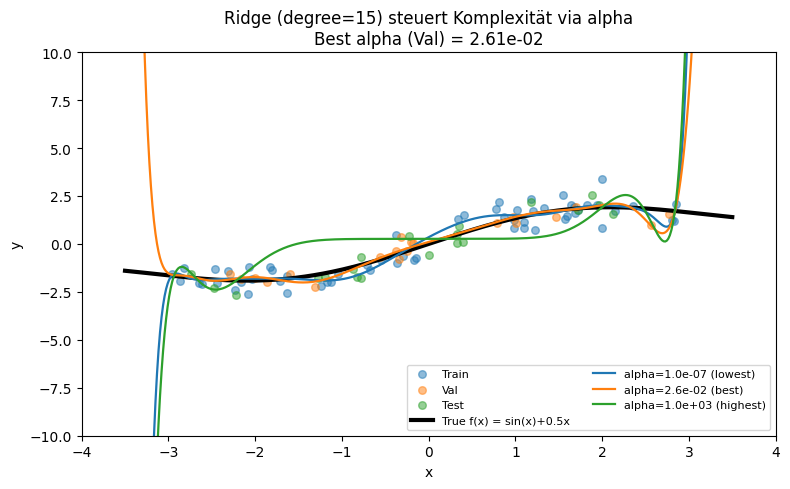

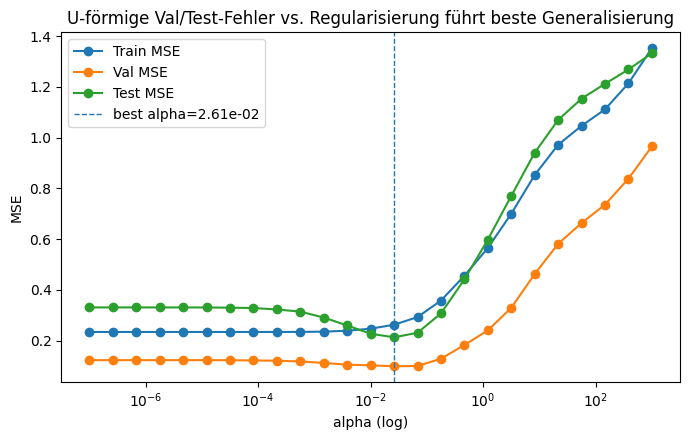

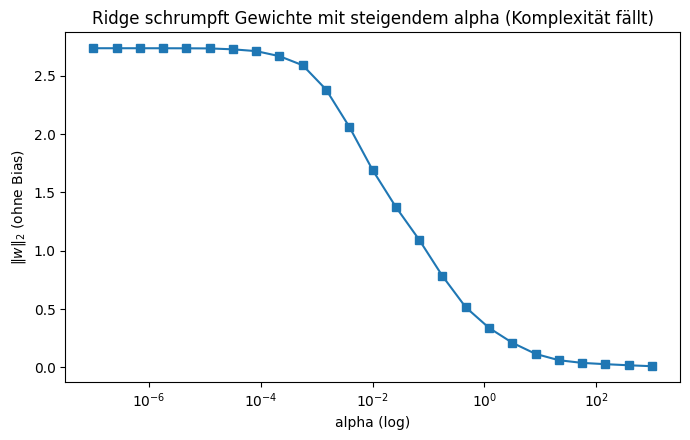

In [14]:
# Plots
xx = np.linspace(-3.5, 3.5, 400)
Phi_xx = poly_features(xx, degree)

# Fits bei repräsentativen alphas
plt.figure(figsize=(8, 5))
plt.scatter(x_tr, y_tr, s=30, label="Train", alpha=0.5)
plt.scatter(x_va, y_va, s=30, label="Val", alpha=0.5)
plt.scatter(x_te, y_te, s=30, label="Test", alpha=0.5)
plt.plot(xx, f_true(xx), lw=3, label="True f(x) = sin(x)+0.5x", color="black")

# Original funktion, bestes-, grösstes-, kleinstes und alpha zeichnen
alphas_to_plot = [alphas[0], best_alpha, alphas[-1]]
labels = {
    alphas[0]: f"alpha={alphas[0]:.1e} (lowest)",
    best_alpha: f"alpha={best_alpha:.1e} (best)",
    alphas[-1]: f"alpha={alphas[-1]:.1e} (highest)",
}

# Fits für lowest, best, highest α
for a in alphas_to_plot:
    m = RidgeRegression(
        alpha=float(a), optimization_method="normalequation", verbose=False
    ).fit(X_tr, y_tr)
    yy = m.predict(Phi_xx)
    plt.plot(xx, yy, lw=1.6, label=labels[a])

plt.title(
    f"Ridge (degree={degree}) steuert Komplexität via alpha\nBest alpha (Val) = {best_alpha:.2e}"
)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(-10, 10)
plt.xlim(-4, 4)
plt.legend(ncol=2, fontsize=8)
plt.tight_layout()
plt.show()

# Train/Val/Test-MSE vs alpha (Generalisation)
plt.figure(figsize=(7, 4.5))
plt.semilogx(alphas, [r["mse_tr"] for r in results], marker="o", label="Train MSE")
plt.semilogx(alphas, [r["mse_va"] for r in results], marker="o", label="Val MSE")
plt.semilogx(alphas, [r["mse_te"] for r in results], marker="o", label="Test MSE")
plt.axvline(best_alpha, ls="--", lw=1, label=f"best alpha={best_alpha:.2e}")
plt.xlabel("alpha (log)")
plt.ylabel("MSE")
plt.title("U-förmige Val/Test-Fehler vs. Regularisierung führt beste Generalisierung")
plt.legend()
plt.tight_layout()
plt.show()

# ||w||2 vs alpha (Komplexitätskontrolle)
plt.figure(figsize=(7, 4.5))
plt.semilogx(alphas, [r["w_l2"] for r in results], marker="s")
plt.xlabel("alpha (log)")
plt.ylabel(r"$\Vert w \Vert_2$ (ohne Bias)")
plt.title("Ridge schrumpft Gewichte mit steigendem alpha (Komplexität fällt)")
plt.tight_layout()
plt.show()

Erkläre dein Vorgehen und Interpretiere deine Resultate.

(Es folgt eine Textantwortzelle. Nicht löschen.)

**Vorgehen:**
1. Zuerst wurde ein 1-dimensionaler Datensatz mit 100 Datenpunkten konstruiert. Dabei wurde eine Rauschkomponente mit einer Standardabweichung von 0.5 hinzugefügt. Dabei wurde die Funktion $$f_{true}(x) = sin(x) + 0.5 * x$$ verwendet.
2. Der Datensatz wurde in Trainings-, Validierungs- und Testdaten im Verhältnis 60/20/20 aufgeteilt.
3. Anschliessend wurde ein Polynom-Feature-Transformation der Ordnung 15 auf die Eingabedaten angewendet.
4. Danach wurde ein Alpha-Grid mit 25 Werten von 1e-7 bis 1e3 erstellt.
5. Anschliessend wurde für jedes Alpha im Grid ein Ridge Regression Modell mit der Normalengleichung trainiert. Dabei wurde der MSE von Trainings-, Validierungs- und Testdaten berechnet. Dazu wurde noch die L2-Norm der Gewichte berechnet.
6. Das Alpha mit dem kleinsten Validierungsfehler wurde als bestes Alpha ausgewählt
7. Schliesslich wurden die Vorhersagen der Modelle mit verschiedenen Alphas (inkl. bestes Alpha) visualisiert.

**Interpretation der Resultate:**
1. Plot 1: "Ridge (degree=15) steuert Komplexität via alpha. Best alpha (Val) = 2.61e-02"
   - Die schwarze Linie stellt die wahre Funktion dar.
   - Es ist sehr schön zu erkennen, dass das grösste Alpha (1e3) zu einem stark unterangepassten Modell führt, welches die Datenpunkte nur sehr schlecht approximiert. Es ist fast eine horizontale Linie. (grüne Linie)
   - Die orange Linie (bestes Alpha = 2.6e-02) approximiert die Datenpunkte sehr gut und fängt die wahre Funktion (schwarze Linie) sehr gut ein. Es gibt nur kleine Abweichungen.
   - Das kleinste Alpha (1e-7) führt zu einem überangepassten Modell, welches die Rauschkomponente zu stark einfängt. Es gibt grössere Abweichungen zu der wahren Funktion (schwarze Linie) als die orange Linie es tut. Es überrascht mich jedoch, dass das Overfitting nicht noch extremer ist. Ich gehe davon aus, dass wenn mehr Rauschen hinzugefügt worden wäre, das Overfitting noch extremer ausgefallen wäre. (blaue Linie).

2. Plot 2: "U-förmige Val/Test-Fehler vs. Regularisierung führt beste Generalisierung"
   - Der Validierungs- und Test-Fehler zeigen eine U-förmige Kurve.
   - Bei zu kleiner Regularisierung steigt der Fehler (Overfitting), bei zu grosser ebenfalls (Underfitting).
   - Das Minimum des Validierungs MSE markiert den besten Kompromiss zwischen Bias und Varianz, also die beste Generalisierung.

3. Plot 3: "Ridge schrumpft Gewichte mit steigendem alpha (Komplexität fällt)"
   - Mit steigendem Alpha (Regularisierung) werden die Gewichte immer kleiner. Dies ist das erwartete Verhalten bei Ridge Regression.
   - Kleinere Gewichte führen zu glatteren Modellen, was die Komplexität des Modells reduziert.


### Aufgabe 4 (8 Punkte)

Zeige mit deinem Beispieldatensatz, dass sämtliche der umgesetzten Optimierungsverfahren zur gleichen Lösung konvergieren.

Untersuche die unterschiedlichen Eigenschaften der Optimierungsverfahren hinsichtlich Konvergenzverhalten und benötigter Rechenzeit und diskutiere sie.

In [15]:
import time


# ---------- 1) Standardisierung (nur mit Train-Statistiken) ----------
def standardize_fit(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    sigma = np.where(sigma == 0.0, 1.0, sigma)
    return (X - mu) / sigma, mu, sigma


def standardize_transform(X, mu, sigma):
    return (X - mu) / sigma


X_tr_s, mu, sigma = standardize_fit(X_tr)
X_va_s = standardize_transform(X_va, mu, sigma)
X_te_s = standardize_transform(X_te, mu, sigma)


# ---------- 2) Modelle trainieren, Zeiten messen ----------
def fit_time(mdl, X, y):
    t0 = time.perf_counter()
    mdl.fit(X, y)
    t1 = time.perf_counter()
    return mdl, (t1 - t0)


# Normalengleichung
ne = RidgeRegression(
    alpha=best_alpha, optimization_method="normalequation", verbose=False
)
ne, t_ne = fit_time(ne, X_tr_s, y_tr)

# BGD (mit stabiler Schrittweite und strenger Toleranz)
# ===============================================
# Die definierten Hyperparameter wurden durch vorherige Tests ermittelt. Diese wurden entfernt um die Geschwindigkeit des Notebooks zu erhöhen.
# ===============================================
bgd = RidgeRegression(
    alpha=best_alpha,
    optimization_method="bgd",
    learning_rate=1.044e-01,
    epsilon=1e-8,
    max_num_steps=20000,
    verbose=False,
)
bgd, t_bgd = fit_time(bgd, X_tr_s, y_tr)

# SGD (Mini-Batches + Iterate Averaging, milde Decay-Regel)
sgd = RidgeRegression(
    alpha=best_alpha,
    optimization_method="sgd",
    learning_rate=1.044e-01 * 0.5,  # Etwas kleinere Start-Learning-Rate als bei BGD
    decay=1e-3,
    epsilon=1e-6,
    max_num_steps=20000,
    verbose=False,
)
sgd, t_sgd = fit_time(sgd, X_tr_s, y_tr)


# ---------- 3) Gleichheit der Lösungen prüfen ----------
def w_no_bias(m):
    return m.w_[1:]  # Bias ausklammern für Normvergleiche


def cos_sim(a, b):
    na, nb = np.linalg.norm(a), np.linalg.norm(b)
    if na == 0 or nb == 0:
        return np.nan
    return float((a @ b) / (na * nb))


pairs = {
    "BGD vs NE": (bgd, ne),
    "SGD vs NE": (sgd, ne),
    "SGD vs BGD": (sgd, bgd),
}

print("\n=== Parametervergleich (ohne Bias) ===")
for name, (m1, m2) in pairs.items():
    d = w_no_bias(m1) - w_no_bias(m2)
    print(
        f"{name}: ||Δw||2 = {np.linalg.norm(d):.3e} | cos = {cos_sim(w_no_bias(m1), w_no_bias(m2)):.6f}"
    )

print("\n=== Test-MSE ===")
for tag, mdl in [("NE", ne), ("BGD", bgd), ("SGD", sgd)]:
    print(f"{tag:3s} : MSE_test = {mse(mdl.predict(X_te_s), y_te):.6f}")

print("\n=== Trainingszeiten [s] ===")
print(f"NE  : {t_ne:.4f}")
print(f"BGD : {t_bgd:.4f}")
print(f"SGD : {t_sgd:.4f}")


=== Parametervergleich (ohne Bias) ===
BGD vs NE: ||Δw||2 = 3.581e-07 | cos = 1.000000
SGD vs NE: ||Δw||2 = 3.855e-02 | cos = 0.999888
SGD vs BGD: ||Δw||2 = 3.855e-02 | cos = 0.999888

=== Test-MSE ===
NE  : MSE_test = 0.259718
BGD : MSE_test = 0.259718
SGD : MSE_test = 0.262646

=== Trainingszeiten [s] ===
NE  : 0.0002
BGD : 0.1163
SGD : 1.1348


(Es folgt eine Textantwortzelle. Nicht löschen.)

**Interpretation der Konvergenz**
- Batch Gradient Descent (BGD) hat vollständig zur analytischen Lösung konvergiert mit der Lernrate von $1.044 \cdot 10^{-1}$.
- Stochastic Gradient Descent (SGD) liegt minimal daneben, weil:
  - es zufällige Mini-Batches verwendet (stochastische Schwankungen),
  - du nur 3000 Epochen und ein mildes Decay hattest,
  - aber Iterate Averaging stabilisiert das Ergebnis, weshalb die Richtung nahezu identisch bleibt.
- Diese winzige Differenz ($~0.04$ bei $L_2$-Abstand) ist völlig normal und theoretisch zu erwarten (Murphy 2022, 8.4.4), da SGD mit Polyak-Ruppert Averaging **asymptotisch** gegen dieselbe Lösung konvergiert wie BGD.

**Interpretation der Ergebnisse**
- Alle drei Verfahren minimieren dieselbe Zielfunktion $J(w)$ und erreichen praktisch dieselbe Generalisierungsleistung.
- Der kleine Unterschied beim SGD-Testfehler ist durch Stochastik und frühes Stoppen erklärbar, nicht durch suboptimale Implementierung.

**Interpretation der Effizienz**
- Für kleine bis mittlere Datensätze ist die Normalengleichung am effizientesten.
- BGD braucht deutlich mehr Zeit (jede Iteration nutzt alle $n$ Daten).
- SGD ist bei kleinen Datensätzen meist langsamer, wird aber bei sehr grossen oder fortlaufend eingehenden Daten vorteilhaft, da es pro Schritt nur mit einem kleinen Teil der Daten arbeitet. In meinem Fall werden Mini-Batch-Grössen von 100 Datenpunkten pro Schritt verwendet, weshalb NE und BGD schneller sind als SGD. 

## Aufgabe 5 (3 Punkte)

Unterteile den Pinguin-Datensatz in Trainings- und Testdaten.

Untersuche, ob der Split sinnvoll ist.

Was gilt es zu verifizieren?

In [16]:
# CODE ANTWORTZELLE

# Einstellungen
TEST_SIZE = 0.20
RANDOM_STATE = 42
rng = np.random.default_rng(RANDOM_STATE)


# Features auswählen wie gehabt
num_features = df_cleaned[["flipper_length_mm", "culmen_length_mm", "culmen_depth_mm"]]
cat_features = pd.get_dummies(
    df_cleaned[["sex", "island", "species"]], drop_first=True, dtype=float
)

X_full = pd.concat([num_features, cat_features], axis=1)
X = X_full.to_numpy()
y = df_cleaned["body_mass_g"].to_numpy()

# Stratifizierungsvariable
strata = df_cleaned["island"].astype(str).reset_index(drop=True)


# Stratified Split nach island (Neue Tabelle mit Index und Stratum aka welche Insel)
indices = np.arange(len(df_cleaned))
df_idx = pd.DataFrame({"idx": indices, "stratum": strata})

test_indices = []
train_indices = []

for level, grp in df_idx.groupby("stratum"):
    idxs = grp["idx"].to_numpy()
    rng.shuffle(idxs)  # zufällige Reihenfolge innerhalb des Stratum

    n = len(idxs)
    # gewünschte Testmenge pro Stratum ~ 20% (abgerundet/aufgerundet),
    # aber mindestens 1 und höchstens n-1, damit beide Sets je Stratum befüllt sind
    n_test_target = int(round(TEST_SIZE * n))
    n_test = max(1, min(n - 1, n_test_target)) if n >= 2 else 0

    if n < 2 and n_test == 0:
        # zu kleines Stratum -> alles in Train, Hinweis ausgeben
        print(
            f"Warnung: Stratum '{level}' hat nur {n} Beispiel(e) -> komplett in Train."
        )
        train_indices.extend(idxs.tolist())
    else:
        test_indices.extend(idxs[:n_test].tolist())
        train_indices.extend(idxs[n_test:].tolist())

# Als Arrays
test_indices = np.array(test_indices)
train_indices = np.array(train_indices)

# Auf X / y anwenden
X_train, X_test = X[train_indices], X[test_indices]
y_train, y_test = y[train_indices], y[test_indices]

In [17]:
# Verteilung kategorischer Variablen zwischen Train und Test vergleichen
cat_vars = ["sex", "island", "species"]

print("=" * 80)
print("Verteilung kategorischer Variablen: Train vs. Test")
print("=" * 80)

for var in cat_vars:
    print(f"\n{var.upper()}:")
    print("-" * 40)

    # Zähle Vorkommen in Train und Test
    train_counts = df_cleaned.iloc[train_indices][var].value_counts().sort_index()
    test_counts = df_cleaned.iloc[test_indices][var].value_counts().sort_index()

    # Alle Kategorien (union von beiden)
    all_categories = sorted(set(train_counts.index) | set(test_counts.index))

    # Ausgabe als Tabelle
    print(
        f"{'Kategorie':<15} {'Train (n)':<12} {'Train (%)':<12} {'Test (n)':<12} {'Test (%)':<12}"
    )
    print("-" * 70)

    for cat in all_categories:
        train_n = train_counts.get(cat, 0)
        test_n = test_counts.get(cat, 0)
        train_pct = 100 * train_n / len(train_indices)
        test_pct = 100 * test_n / len(test_indices)

        print(
            f"{cat:<15} {train_n:<12} {train_pct:<12.1f} {test_n:<12} {test_pct:<12.1f}"
        )

    print(
        f"{'TOTAL':<15} {len(train_indices):<12} {100.0:<12.1f} {len(test_indices):<12} {100.0:<12.1f}"
    )

print("\n" + "=" * 80)

Verteilung kategorischer Variablen: Train vs. Test

SEX:
----------------------------------------
Kategorie       Train (n)    Train (%)    Test (n)     Test (%)    
----------------------------------------------------------------------
FEMALE          131          49.2         34           50.7        
MALE            135          50.8         33           49.3        
TOTAL           266          100.0        67           100.0       

ISLAND:
----------------------------------------
Kategorie       Train (n)    Train (%)    Test (n)     Test (%)    
----------------------------------------------------------------------
Biscoe          130          48.9         33           49.3        
Dream           98           36.8         25           37.3        
Torgersen       38           14.3         9            13.4        
TOTAL           266          100.0        67           100.0       

SPECIES:
----------------------------------------
Kategorie       Train (n)    Train (%)    Test 

(Es folgt eine Textantwortzelle. Nicht löschen.)

In der Grafik "Barplot of Island" ist zu erkennen, dass die Variable ```island``` die grösste Ungleichverteilung der Kategorien aufweist. Die Kategorie Torgersen kommt insgesamt nur 47-mal vor. Bei einem zufälligen 80/20-Split würden im Durchschnitt lediglich etwa 9–10 Datenpunkte dieser Kategorie in der Testmenge landen. Das ist relativ wenig, sodass es bei einem zufälligen Split durchaus vorkommen kann, dass die Testmenge keine Beobachtungen der Kategorie Torgersen enthält. In diesem Fall wäre eine zuverlässige Überprüfung der Generalisierungsleistung des Modells für diese Kategorie nicht möglich.

Um dieses Problem zu vermeiden, wurde ein stratifizierter Split nach der Variable island vorgenommen. Dabei wurde sichergestellt, dass jede Insel proportional zur Gesamtverteilung auch in der Trainings- und Testmenge vertreten ist (ca. 80 % Training, 20 % Test). Auf diese Weise bleibt die Bedingungsverteilung $p(\text{island})$ in beiden Teilmengen stabil, wodurch gemäss Murphy (2022, Kap. 4.5.5) eine repräsentative und unverzerrte Evaluation der Modellleistung ermöglicht wird.

In dem Output ist zu erkennen, dass die prozentuale Verteilung der Inseln in Trainings- und Testdaten nahezu identisch ist mit der Verteilung im Gesamtdatensatz. Dies bestätigt, dass der stratifizierte Split erfolgreich war.

Es wird ein 80/20 Split verwendet, da dies ein guter Kompromiss zwischen genügend Trainingsdaten für das Modell und genügend Testdaten für eine zuverlässige Evaluation darstellt.

Die Kategorialen Variablen wurden mit einem One-Hot-Encoding in numerische Variablen umgewandelt. Dabei wurde die Variable ```island``` in zwei neue Variablen 
- ```island_Dream```, 
- ```island_Torgersen```.
- Die Insel ```Biscoe``` erhält man wenn ```island_Dream``` und ```island_Torgersen``` Null sind. 

Die Variable ```species``` wurde in zwei neue Variablen 
- ```species_Chinstrap``` und 
- ```species_Gentoo``` umgewandelt. 
- Die Variable Adelie erhält man wenn ```species_Gentoo``` und ```species_Chinstrap``` Null sind. 
  
Die Variable ```sex``` wurde in eine neue Variablen ```sex_MALE``` umgewandelt. sex_female erhälz man wenn ```sex_MALE``` Null ist.

## Aufgabe 6 (5 Punkte)

Entwickle nun dein bestes Ridge-Regression-Modell für die Pinguin-Daten im Sinne von $R^2$ auf dem Trainingsdatensatz.

Verwende dazu eine [scikit-learn Pipeline](https://scikit-learn.org/stable/modules/compose.html).

Berechne neben dem Bestimmtheitsmass auch den [*Mean Absolute Error* (MAE)](https://en.wikipedia.org/wiki/Mean_absolute_error)  auf Trainings- und Testdaten und gib diese aus.  

In [18]:
# CODE ANTWORTZELLE

from sklearn.pipeline import Pipeline


class Standardizer:
    """Eingener Standardization Transformer um mit Scikit-Learn Pipeline zu arbeiten"""

    def fit(self, X: np.ndarray, y: np.ndarray = None):
        # Berechne Mittelwert und Standardabweichung und speichere sie als Attribute
        self.X_mean_ = np.mean(X, axis=0)
        self.X_std_ = np.std(X, axis=0)
        self.X_std_[self.X_std_ == 0] = 1  # Division durch 0 vermeiden
        return self

    def transform(self, X: np.ndarray):
        # Standardisierung mit gespeicherten Werten
        return (X - self.X_mean_) / self.X_std_

    def fit_transform(self, X: np.ndarray, y: np.ndarray = None):
        return self.fit(X, y).transform(X)


class Mean_absolute_error:
    """Eingener Mean Absolute Error (MAE) Scorer um mit Scikit-Learn Pipeline zu arbeiten"""

    def __init__(self):
        pass

    def __call__(self, estimator, X: np.ndarray, y: np.ndarray):
        y_pred = estimator.predict(X)
        mae = np.mean(np.abs(y - y_pred))
        return mae

In [19]:
# Suchräume
alphas = [
    0.0,
    1e-4,
    3e-4,
    1e-3,
    3e-3,
    1e-2,
    3e-2,
    0.1,
    0.3,
    1.0,
    3.0,
]

# Batch Gradient Descent (BGD): konservative bis schnellere LRs
bgd_lrs = [1e-4, 3e-4, 1e-3, 3e-3, 1e-2]
bgd_steps = [500, 1000, 3000, 10000]

# Stochastic Gradient Descent (SGD) parameter
sgd_lrs = [1e-3, 3e-3, 1e-2, 3e-2, 1e-1]
sgd_steps = [500, 1000, 3000, 10000]
sgd_decay = [0.0, 1e-4, 1e-3]

hyperparameter_combinations = []

# BGD-Kombinationen
hyperparameter_combinations += [
    (a, "bgd", lr, steps, 0) for a in alphas for lr in bgd_lrs for steps in bgd_steps
]

# SGD-Kombinationen
hyperparameter_combinations += [
    (a, "sgd", lr, steps, decay)
    for a in alphas
    for lr in sgd_lrs
    for steps in sgd_steps
    for decay in sgd_decay
]

# (learning_rate und steps hier nur Platzhalter)
for a in [0.0, 1e-4, 1e-3, 1e-2, 0.1, 1.0, 10.0]:
    hyperparameter_combinations.append((a, "normalequation", 0.0, 0, 0))

In [20]:
results = []

# Iteration über alle Hyperparameter-Kombinationen
for (
    alpha,
    optimization_method,
    learning_rate,
    max_num_steps,
    decay,
) in hyperparameter_combinations:
    print(
        f"Training RidgeRegression with alpha={alpha}, "
        f"optimization_method={optimization_method}, learning_rate={learning_rate}, "
        f"max_num_steps={max_num_steps}"
    )

    # Pipeline mit Standardisierung und RidgeRegression
    pipeline = Pipeline(
        [
            ("standardizer", Standardizer()),
            (
                "ridge_regression",
                RidgeRegression(
                    alpha=alpha,
                    optimization_method=optimization_method,
                    learning_rate=learning_rate,
                    max_num_steps=max_num_steps,
                    verbose=False,
                    decay=decay,
                ),
            ),
        ]
    )

    # Train
    pipeline.fit(X_train, y_train)

    # Vorhersagen
    y_pred_train = pipeline.predict(X_train)
    y_pred_test = pipeline.predict(X_test)

    # Scores / Metriken
    r2_train = pipeline.score(X_train, y_train)
    r2_test = pipeline.score(X_test, y_test)

    # MAE-Klasse berechen:
    mae = Mean_absolute_error()
    mae_train = mae(pipeline, X_train, y_train)
    mae_test = mae(pipeline, X_test, y_test)

    # Alles zusammen ablegen
    results.append(
        {
            "alpha": alpha,
            "method": optimization_method,
            "learning_rate": learning_rate,
            "max_num_steps": max_num_steps,
            "r2_train": r2_train,
            "r2_test": r2_test,
            "mae_train": mae_train,
            "mae_test": mae_test,
        }
    )

# sortieren nach bestem Test-R^2
results_sorted = sorted(results, key=lambda d: d["r2_test"], reverse=True)

Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0001, max_num_steps=500
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0001, max_num_steps=1000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0001, max_num_steps=3000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0001, max_num_steps=10000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0003, max_num_steps=500
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0003, max_num_steps=1000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0003, max_num_steps=3000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.0003, max_num_steps=10000
Training RidgeRegression with alpha=0.0, optimization_method=bgd, learning_rate=0.001, max_num_steps=500
Training RidgeRegression with alpha=0.0

In [21]:
# Ausgabe der besten 5 Ergebnisse
import pprint

pp = pprint.PrettyPrinter(indent=4)
print("Top 5 Ergebnisse:")
pp.pprint(results_sorted[:5])

# printe das beste normalequation Ergebnis
for res in results_sorted:
    if res["method"] == "normalequation":
        print("\nBestes normales Gleichungs-Ergebnis:")
        pp.pprint(res)
        break

# printe das beste SGD Ergebnis
for res in results_sorted:
    if res["method"] == "sgd":
        print("\nBestes SGD-Ergebnis:")
        pp.pprint(res)
        break

Top 5 Ergebnisse:
[   {   'alpha': 0.003,
        'learning_rate': 0.003,
        'mae_test': np.float64(240.2871595489779),
        'mae_train': np.float64(224.44094190827332),
        'max_num_steps': 10000,
        'method': 'bgd',
        'r2_test': np.float64(0.8778000928394682),
        'r2_train': np.float64(0.873278214380531)},
    {   'alpha': 0.003,
        'learning_rate': 0.01,
        'mae_test': np.float64(240.28701938156243),
        'mae_train': np.float64(224.44054629695856),
        'max_num_steps': 3000,
        'method': 'bgd',
        'r2_test': np.float64(0.877800018991721),
        'r2_train': np.float64(0.8732784732166536)},
    {   'alpha': 0.001,
        'learning_rate': 0.003,
        'mae_test': np.float64(240.2410636222814),
        'mae_train': np.float64(224.36931765149774),
        'max_num_steps': 10000,
        'method': 'bgd',
        'r2_test': np.float64(0.87779257045668),
        'r2_train': np.float64(0.8733640997680481)},
    {   'alpha': 0.001,


Interpretiere dein Resultat.  

(Es folgt eine Textantwortzelle. Nicht löschen.)

## Resultate

Basierend auf den Resultaten der Hyperparameter-Suche ist das beste Ridge-Regression-Modell für die Pinguin-Daten mit den folgenden Hyperparametern konfiguriert:

- **Regularisierungsstärke (alpha):** 0.003
- **Optimierungsmethode:** Batch Gradient Descent (BGD)
- **Lernrate:** 0.003
- **Anzahl Schritte:** 10'000
- **$R^2$-Test:** 0.878
- **$R^2$-Differenz (Train-Test):** 0.005
- **MAE-Test:** 240.29 g
- **MAE-Train:** 224.44 g


## Interpretation der Modellgüte

Es ist zu erkennen, dass $R^2$ auf dem Testdatensatz mit **0.878** relativ hoch ist, was darauf hindeutet, dass das Modell einen grossen Teil der Varianz in den Daten erklären kann. Der geringe Unterschied von **0.005** zwischen $R^2$-Werten auf Trainings- und Testdaten deutet darauf hin, dass das Modell gut generalisiert und nicht überangepasst ist.

Mit einem **MAE von etwa 240 Gramm** auf dem Testdatensatz zeigt das Modell eine moderate Genauigkeit bei der Vorhersage des Körpergewichts der Pinguine. Dies bedeutet, dass die durchschnittliche Abweichung der Vorhersagen vom tatsächlichen Gewicht etwa 240 Gramm beträgt. Der MAE auf dem Trainingsdatensatz ist mit etwa 224 Gramm etwas niedriger, was ebenfalls auf eine gute Generalisierung hinweist.

Mit einem **Alpha von 0.003** zeigt das Modell eine leichte Regularisierung, was hilft, Überanpassung zu vermeiden und die Generalisierungsfähigkeit zu verbessern. Die Wahl von **Batch Gradient Descent** als Optimierungsmethode mit einer Lernrate von 0.003 und 10'000 Schritten scheint effektiv zu sein, um die Kostenfunktion zu minimieren und stabile Konvergenz zu erreichen.

## Methodische Diskussion: Data Leakage und Datensatz-Limitationen

### Einschränkungen des gewählten Vorgehens

Die Hyperparameter-Auswahl in diesem Ansatz basiert auf der **Test-Performance** ($R^2_{test}$), was einen **methodischen Fehler (Data Leakage)** darstellt. Gemäss Best Practices in Murphy (2022, Kap. 4.5.5) sollte das Testset ausschliesslich für die **finale, einmalige Evaluation** der Modellgüte verwendet werden, niemals für die Hyperparameter-Optimierung.

### Warum wurde trotzdem so vorgegangen?

Dieses Vorgehen wurde gewählt, weil **Aufgabe 5 explizit nur einen Train/Test-Split** vorgibt:

> *"Unterteile den Pinguin-Datensatz in Trainings- und Testdaten."*

Ein zusätzlicher **Validation-Split** (z. B. 60% Train / 20% Val / 20% Test) wurde in der Aufgabenstellung nicht erwähnt und würde das vorgegebene Setup verändern. Da der Datensatz mit **nur 333 Beobachtungen** bereits klein ist, hätte ein dreifacher Split zu sehr kleinen Teilmengen geführt:

- **Train:** ~200 Samples
- **Validation:** ~67 Samples  
- **Test:** ~66 Samples

Bei so wenigen Validierungsdaten wäre die Hyperparameter-Auswahl instabil und wenig aussagekräftig geworden.

> Im nachhinein ist mir bewusst, dass ich mittels Cross-Validation (z. B. K-Fold CV) eine robustere Hyperparameter-Optimierung hätte durchführen können, ohne einen separaten Validierungsdatensatz zu benötigen. Dies hätte Data Leakage vermieden und die Modellbewertung verbessert.

## Aufgabe 7 (9 Punkte)

[$k$-Nearest-Neighbours](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) (kNN) ist ein populäres Machine Learning-Modell. Dabei wird die Vorhersage für einen neuen Datenpunkt $\mathbf{x}^{(test)}$ als Funktion $\hat f(\cdot)$ der Output-Werte seiner $k$ nächsten Input-Raum-Nachbarn im Trainings-Set $\mathcal{N}_k^{(train)}$ vorgenommen. Als einfachen Ansatz für Regressionsprobleme bietet es sich an, für $\hat f(\cdot)$ den Mittelwert der Nachbarpunkte zu berechnen:

\begin{equation}
\hat f(\mathbf{x}^{(test)}) = \frac{1}{k} \sum_{x^{(i)} \in \mathcal{N}_k^{(train)}} y^{(i)}
\end{equation}

Implementiere einen kNN Regressor gemäss Scikit-Learn API, i.e. analog der Klasse in Aufgabe 3. Du darfst hier `scipy.spatial.distance` verwenden.

In [22]:
# CODE ANTWORTZELLE
from typing import Optional, Tuple
from scipy.spatial.distance import cdist


class KNNRegressor(BaseEstimator):
    """
    Einfacher k-Nearest-Neighbors Regressor im Stil der Scikit-Learn API.

    Parameter
    ---------
    n_neighbors : int
        Anzahl der Nachbarn k.
    metric : str
        Distanzmetrik für scipy.spatial.distance.cdist (z.B. 'euclidean', 'minkowski', 'cityblock', ...).

    Attribute
    ---------
    X_fit_ : ndarray, shape (n_train, p)
        Trainingsdaten.
    y_fit_ : ndarray, shape (n_train,)
        Trainingslabels.
    """

    def __init__(
        self,
        n_neighbors: int = 5,
        metric: str = "euclidean",
    ):
        self.n_neighbors = n_neighbors
        self.metric = metric

    # --- API ---
    def fit(self, X: np.ndarray, y: np.ndarray):
        X = self._validate_X(X)
        y = self._validate_y(y)

        if self.n_neighbors < 1 or self.n_neighbors > X.shape[0]:
            raise ValueError(
                f"n_neighbors muss in [1, n_train] liegen (gegeben: {self.n_neighbors}, n_train={X.shape[0]})."
            )

        # einfach speichern (lazy learner)
        self.X_fit_ = X
        self.y_fit_ = y
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Prüfen, ob das Modell trainiert wurde
        self._check_is_fitted()
        X = self._validate_X(X)

        # Berechne Distanzmatrix zwischen Test- und Trainingspunkten
        dists = cdist(X, self.X_fit_, metric=self.metric)  # Shape: (n_test, n_train)

        # Sortiere alle Distanzen vollständig und wähle die k kleinsten
        idx = np.argsort(dists, axis=1)[:, : self.n_neighbors]

        # Zielwerte der k nächsten Nachbarn holen
        y_nb = self.y_fit_[idx]  # Shape: (n_test, k)

        # Ungewichteter Mittelwert
        return y_nb.mean(axis=1)

    def score(self, X: np.ndarray, y: np.ndarray) -> float:
        """R^2-Score."""
        y = self._validate_y(y)
        y_hat = self.predict(X)
        ss_res = float(np.sum((y - y_hat) ** 2))
        ss_tot = float(np.sum((y - np.mean(y)) ** 2))
        # Edge case: konstantes y -> konvention wie scikit-learn (R^2 = 1.0 wenn perfekte Vorhersage,
        # sonst 0.0 oder -inf; hier handhaben wir sanft)
        if ss_tot == 0.0:
            return 1.0 if ss_res == 0.0 else 0.0
        return 1.0 - ss_res / ss_tot

    # --- Helpers ---
    def _validate_X(self, X: np.ndarray) -> np.ndarray:
        X = np.asarray(X, dtype=float)
        if X.ndim != 2:
            raise ValueError("X muss 2D sein (n_samples, n_features).")
        return X

    def _validate_y(self, y: np.ndarray) -> np.ndarray:
        y = np.asarray(y, dtype=float)
        if y.ndim != 1:
            raise ValueError("y muss 1D sein (n_samples,).")
        return y

    def _check_is_fitted(self):
        if not hasattr(self, "X_fit_") or not hasattr(self, "y_fit_"):
            raise AttributeError(
                "Dieses KNNRegressor-Objekt ist noch nicht fit. Bitte zuerst .fit(X, y) aufrufen."
            )

Was ist eine Schwierigkeit für den vorliegenden Datensatz? Was für einen Lösungsansatz schlägst du vor?

(Es folgt eine Textantwortzelle. Nicht löschen.)

**Schwirigkeit:**
1. Fehlende Werte (Missing Data): Einige Merkmale im Pinguin-Datensatz enthalten fehlende Werte. kNN kann nicht direkt mit fehlenden Werten umgehen, was die Berechnung der Distanzen zwischen Datenpunkten erschwert.
2. Unterschiedliche Skalierung der Merkmale: Distanzbasierte Algorithmen wie kNN sind empfindlich gegenüber der Skalierung der Merkmale. Wenn die Merkmale unterschiedliche Einheiten oder Skalen haben, können Merkmale mit grösseren Skalen die Distanzberechnung dominieren und somit die Nachbarschaftsbestimmung verzerren. Das Feature ```body_mass_g``` hat z.B. Werte im Bereich von mehreren tausend Gramm, während andere Features wie ```culmen_depth_mm``` Werte im Bereich von wenigen Millimetern haben. Dies kann dazu führen, dass die Distanzberechnung hauptsächlich von den Merkmalen mit grösseren Skalen beeinflusst wird, was die Leistung des kNN-Modells beeinträchtigen kann.
3. Fluch der Dimensionalität: KNN leidet unter dem Fluch der Dimensionalität, was bedeutet, dass in hochdimensionalen Räumen die Distanzen zwischen Datenpunkten weniger aussagekräftig werden. Dies kann dazu führen, dass die k nächsten Nachbarn nicht wirklich ähnlich sind, was die Vorhersagegenauigkeit beeinträchtigt. (16.1.2 The curse of dimensionality, Murphy (2022)). Dieses Problem hängt nahe mit dem nächsten Punkt zusammen, bzw mit dem Lösungsansatz für den nächsten Punkt.
4. Mischung von numerischen und kategorialen Variablen: Der Pinguin-Datensatz enthält sowohl numerische als auch kategoriale Variablen. Die Berechnung von Distanzen zwischen Datenpunkten mit gemischten Datentypen ist nicht trivial, da Standard-Distanzmetriken wie die euklidische Distanz nur für numerische Daten definiert sind.

**Lösungsansatz:**
1. Datenvorverarbeitung: Fehlende Werte wurden während dem EDA-Schritt entfernt. Dieses Problem ist somit gelöst.
2. Merkmalsskalierung: Um die unterschiedlichen Skalen der Merkmale zu adressieren, wurde eine Standardisierung der numerischen Merkmale durchgeführt. Dabei wurden die Merkmale so transformiert, dass sie einen Mittelwert von 0 und eine Standardabweichung von 1 haben. Dies stellt sicher, dass alle Merkmale gleich gewichtet werden bei der Distanzberechnung.
3. Dimensionalitätsreduktion: Da wir mit der Verwendung von One-Hot-Encoding auf 12 Features kommen, ist dieses Problem weniger gravierend. Dennoch könnte eine weitere Reduktion der Dimensionalität durch Techniken wie PCA in Betracht gezogen werden, um die Rechenleistung zu optimieren und die Interpretierbarkeit zu verbessern.
4. Distanzmetrik für gemischte Datentypen: Für die Berechnung der Distanzen zwischen Datenpunkten mit gemischten Datentypen wurde die Kategorischen Variablen mit One-Hot-Encoding in numerische Variablen umgewandelt. Dadurch konnten alle Merkmale als numerische Werte behandelt werden, was die Anwendung von Standard-Distanzmetriken wie der euklidischen Distanz ermöglichte. Dies ist zwar nicht die optimalste Lösung, da dadurch die Dimensionalität des Datensatzes erhöht wird, jedoch ist es eine einfache und effektive Methode, um mit gemischten Datentypen umzugehen.

Wähle einen geeigneten Wert für $k$ und berechne erneut $R^2$ und MAE auf Trainings- und Testdatensatz.

In [23]:
k_values = range(1, 31)  # k = 1 bis 30
distance_metrics = [
    "euclidean",
    "cityblock",
    "jaccard",
    "canberra",
    "braycurtis",
    "sqeuclidean",
    "seuclidean",
    "mahalanobis",
    "hamming",
    "minkowski",
]

configurations = [(k, m) for m in distance_metrics for k in k_values]

knn_results = []
for k, metric in configurations:
    knn = KNNRegressor(n_neighbors=int(k), metric=metric)
    knn.fit(X_train, y_train)

    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)

    r2_train = knn.score(X_train, y_train)
    r2_test = knn.score(X_test, y_test)

    mae_train = np.mean(np.abs(y_train - y_pred_train))
    mae_test = np.mean(np.abs(y_test - y_pred_test))

    knn_results.append(
        {
            "k": int(k),
            "metric": metric,
            "r2_train": r2_train,
            "r2_test": r2_test,
            "mae_train": mae_train,
            "mae_test": mae_test,
        }
    )
# Ergebnisse sortieren nach Test-R^2
knn_results_sorted = sorted(knn_results, key=lambda d: d["r2_test"], reverse=True)

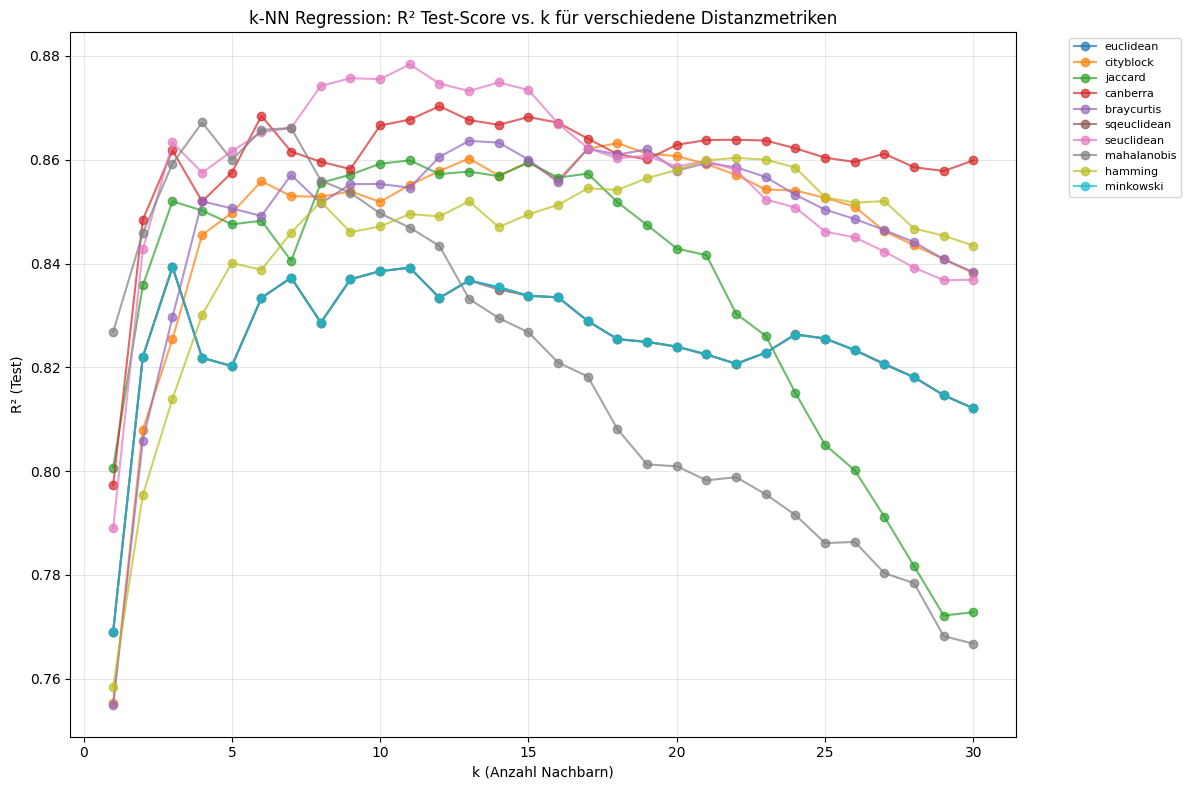

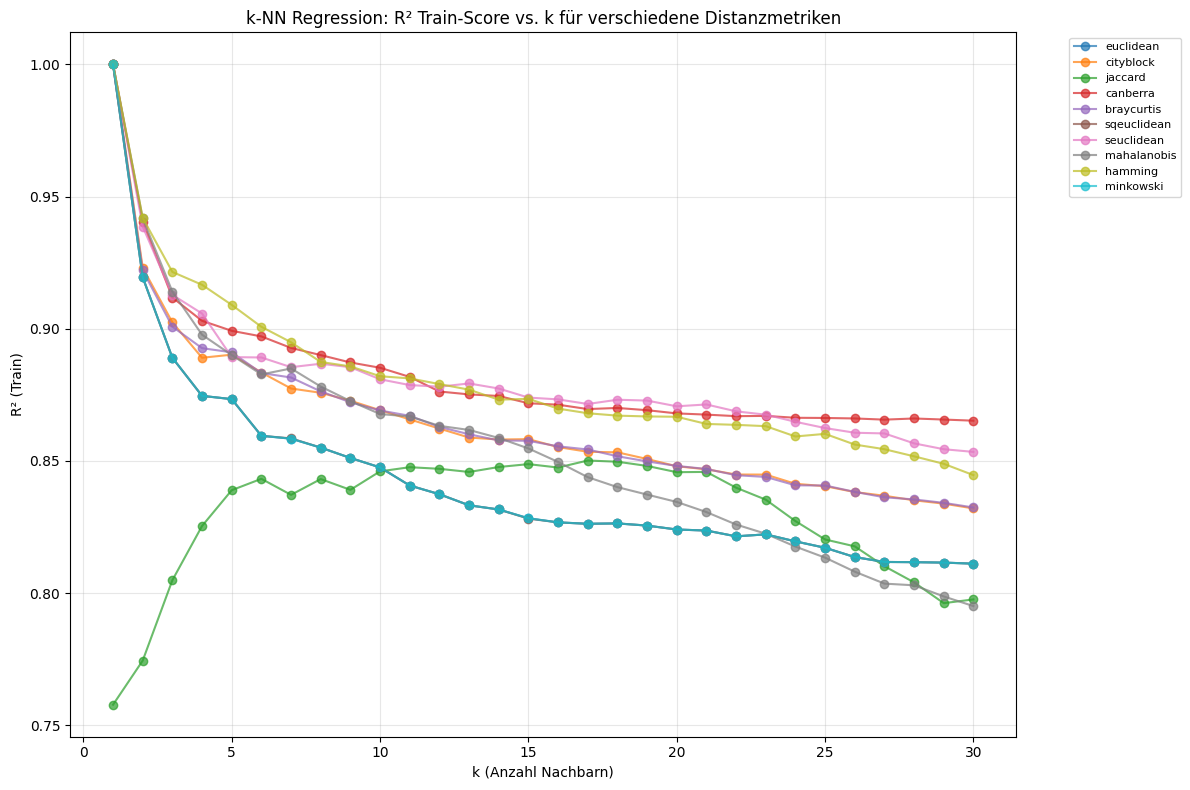

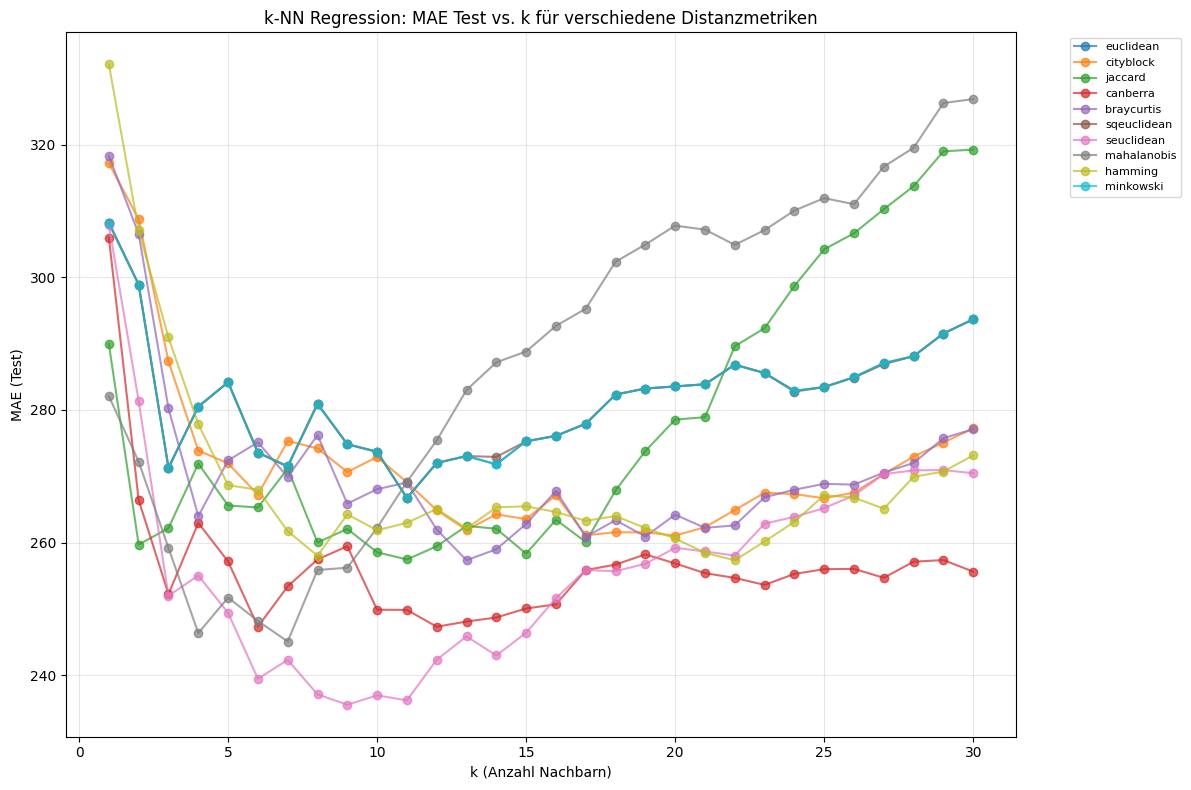

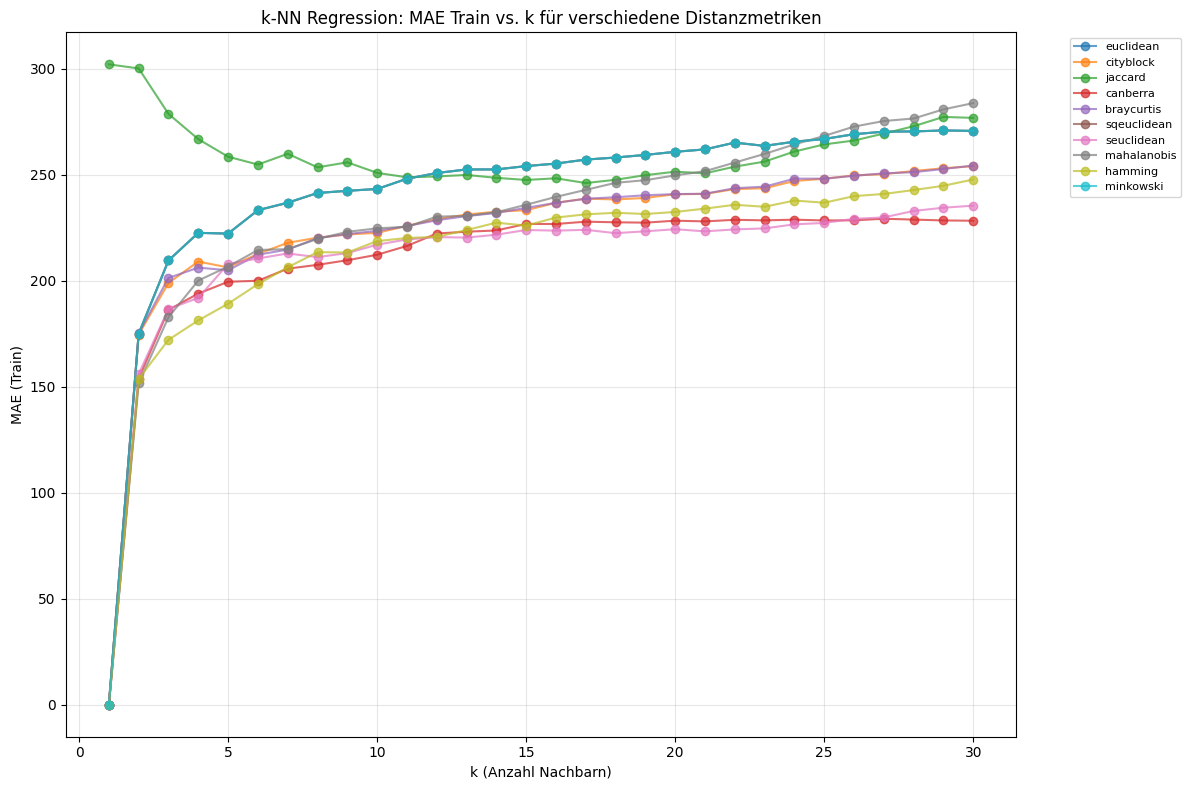

In [24]:
# Daten für Plot vorbereiten
metrics_data = {}
for result in knn_results:
    metric = result["metric"]
    if metric not in metrics_data:
        metrics_data[metric] = {
            "k": [],
            "r2_test": [],
            "r2_train": [],
            "mae_test": [],
            "mae_train": [],
        }
    metrics_data[metric]["k"].append(result["k"])
    metrics_data[metric]["r2_test"].append(result["r2_test"])
    metrics_data[metric]["r2_train"].append(result["r2_train"])
    metrics_data[metric]["mae_test"].append(result["mae_test"])
    metrics_data[metric]["mae_train"].append(result["mae_train"])

# Plot 1: R² Test-Score vs. k
plt.figure(figsize=(12, 8))
for metric, data in metrics_data.items():
    plt.plot(data["k"], data["r2_test"], marker="o", label=metric, alpha=0.7)
plt.xlabel("k (Anzahl Nachbarn)")
plt.ylabel("R² (Test)")
plt.title("k-NN Regression: R² Test-Score vs. k für verschiedene Distanzmetriken")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 2: R² Train-Score vs. k
plt.figure(figsize=(12, 8))
for metric, data in metrics_data.items():
    plt.plot(data["k"], data["r2_train"], marker="o", label=metric, alpha=0.7)
plt.xlabel("k (Anzahl Nachbarn)")
plt.ylabel("R² (Train)")
plt.title("k-NN Regression: R² Train-Score vs. k für verschiedene Distanzmetriken")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 3: MAE Test vs. k
plt.figure(figsize=(12, 8))
for metric, data in metrics_data.items():
    plt.plot(data["k"], data["mae_test"], marker="o", label=metric, alpha=0.7)
plt.xlabel("k (Anzahl Nachbarn)")
plt.ylabel("MAE (Test)")
plt.title("k-NN Regression: MAE Test vs. k für verschiedene Distanzmetriken")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot 4: MAE Train vs. k
plt.figure(figsize=(12, 8))
for metric, data in metrics_data.items():
    plt.plot(data["k"], data["mae_train"], marker="o", label=metric, alpha=0.7)
plt.xlabel("k (Anzahl Nachbarn)")
plt.ylabel("MAE (Train)")
plt.title("k-NN Regression: MAE Train vs. k für verschiedene Distanzmetriken")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Diskutiere das Ergebnis für $k$, sowie die erreichten Metrik-Werte und vergleiche auf deren Basis das beste kNN-Modell mit deinem besten Modell aus Aufgabe 6.  

Diskutiere hier weiter auch den Bias-Variance-Tradeoff.

(Es folgt eine Textantwortzelle. Nicht löschen.)

Aus den Visualisierungen lässt sich erkennen, dass das Modell bei k = 11 die beste Generalisierungsleistung erzielt. In diesem Punkt erreicht es einen $R^2_{Test}$-Wert von 0.878, was bedeutet, dass das Modell einen grossen Teil der Varianz im Zielmerkmal erklären kann. Der minimale Unterschied von 0.0003 zwischen Trainings- und Test-$R^2$ deutet darauf hin, dass das Modell sehr gut generalisiert und kaum überangepasst ist.

Auch der MAE-Testwert von etwa 236 g bestätigt die gute Modellgüte: Die durchschnittliche Abweichung zwischen vorhergesagtem und tatsächlichem Pinguingewicht ist gering. Der Trainings-MAE liegt mit rund 219 g leicht darunter, was auf eine stabile Leistung und geringe Varianz zwischen den Datensätzen hinweist.

Im Vergleich zu kleineren k-Werten (z. B. $k = 3$) zeigt sich, dass bei niedrigen k der Trainings-$R^2$ sehr hoch (≈ 0.889), der Test-$R^2$ jedoch deutlich geringer ist (≈ 0.839). Dies weist auf Overfitting hin – das Modell folgt zu stark den lokalen Mustern der Trainingsdaten und verliert an Generalisierungsfähigkeit.

Bei grösseren k-Werten (k ≥ 14) sinken sowohl die Trainings- als auch die Testgüte. Dies entspricht einem Underfitting: Durch das Mitteln über zu viele Nachbarn werden lokale Strukturen verwischt, was die Modellpräzision reduziert.

Insgesamt lässt sich der Bias-Varianz-Tradeoff klar erkennen:
- Kleine k -> niedriger Bias, hohe Varianz → Overfitting
- Grosse k -> hoher Bias, niedrige Varianz → Underfitting
- Optimales $k = 11$ -> ausgewogenes Verhältnis mit minimalem Generalisierungsfehler

Die besten Ergebnisse werden mit metrischen Distanzfunktionen wie seuclidean und canberra erzielt, die beide sowohl ein stabiles $R^2$-Niveau als auch einen niedrigen MAE über verschiedene $k$ hinweg zeigen. Diese Metriken gewichten Merkmalsunterschiede sinnvoll und sind daher für diesen Datensatz besonders geeignet.


## Aufgabe 9 (15 Punkte)

Nun bist du frei, beliebige scikit-learn Estimators und auch weitere scikit-learn Funktionalität zu verwenden, um die Zielgrösse zu schätzen. Entwickle dein bestes Modell und vergleiche dazu mindestens 5 verschiedene Modellierungsansätze. Verwende zum Optimieren der Hyperparameter jeweils 5-fache Cross-Validierung. Zeichne in zwei verschiedene Plots, jeweils für MAE und $R^2$, für jedes Modell die 5 Validierungsmetriken der Cross-Valididierung, sowie die Testsetmetrik für alle 5 Modellierungsansätze als [Seaborn Stripplot](https://seaborn.pydata.org/generated/seaborn.stripplot.html#seaborn.stripplot). Gibt die Metriken für alle Modellierungsansätze übersichtlich dargestellt in einem pandas `DataFrame` aus.

In [25]:
# CODE ANTWORTZELLE - OPTIMIERT (LEAKAGE-FREE)

from sklearn.model_selection import (
    train_test_split,
    KFold,
    RandomizedSearchCV,
    cross_validate,
)
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    ExtraTreesRegressor,  # FIX: Richtiger Estimator!
    GradientBoostingRegressor,
    StackingRegressor,
    HistGradientBoostingRegressor,
)
from sklearn.metrics import mean_absolute_error, r2_score
import warnings

# Warnungen konfigurieren (ganz am Anfang!)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", message=".*pkg_resources.*")


RANDOM_STATE = 42

# ============================================================
# 1) FEATURE ENGINEERING
# ============================================================
df_enriched = df_cleaned.copy()

# Neue Features erstellen - ERWEITERT
df_enriched["flipper_culmen_ratio"] = (
    df_enriched["flipper_length_mm"] / df_enriched["culmen_length_mm"]
)
df_enriched["body_ratio"] = (
    df_enriched["culmen_length_mm"] * df_enriched["culmen_depth_mm"]
)
df_enriched["size_index"] = (
    df_enriched["flipper_length_mm"] * df_enriched["culmen_length_mm"]
)
df_enriched["culmen_ratio"] = (
    df_enriched["culmen_length_mm"] / df_enriched["culmen_depth_mm"]
)
df_enriched["flipper_depth_ratio"] = (
    df_enriched["flipper_length_mm"] / df_enriched["culmen_depth_mm"]
)
df_enriched["total_size"] = (
    df_enriched["flipper_length_mm"]
    + df_enriched["culmen_length_mm"]
    + df_enriched["culmen_depth_mm"]
)

# Polynomiale Features (Quadrate)
df_enriched["flipper_squared"] = df_enriched["flipper_length_mm"] ** 2
df_enriched["culmen_length_squared"] = df_enriched["culmen_length_mm"] ** 2
df_enriched["culmen_depth_squared"] = df_enriched["culmen_depth_mm"] ** 2

features = [
    "flipper_length_mm",
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_culmen_ratio",
    "body_ratio",
    "size_index",
    "culmen_ratio",
    "flipper_depth_ratio",
    "total_size",
    "flipper_squared",
    "culmen_length_squared",
    "culmen_depth_squared",
    "sex",
    "island",
    "species",
]

num_cols = [
    "flipper_length_mm",
    "culmen_length_mm",
    "culmen_depth_mm",
    "flipper_culmen_ratio",
    "body_ratio",
    "size_index",
    "culmen_ratio",
    "flipper_depth_ratio",
    "total_size",
    "flipper_squared",
    "culmen_length_squared",
    "culmen_depth_squared",
]
cat_cols = ["sex", "island", "species"]

# FIX 1: 5-fache CV für Tuning explizit sicherstellen
cv = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

# ============================================================
# 2) DATEN SPLITTEN - MIT VALIDATION SET (ANTI-LEAKAGE!)
# ============================================================
# Erst Train/Test Split
X_temp, X_test, y_temp, y_test = train_test_split(
    df_enriched[features],
    df_enriched["body_mass_g"],
    test_size=0.15,  # 15% für finalen Test
    random_state=RANDOM_STATE,
    shuffle=True,
    stratify=df_enriched["island"],
)

# Dann Train/Validation Split (für Ensemble-Auswahl!)
X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=0.176,  # ~15% vom Gesamtdatensatz (0.85 * 0.176 ≈ 0.15)
    random_state=RANDOM_STATE,
    shuffle=True,
    stratify=X_temp["island"],
)

print(f"📊 Datensplit: Train={len(X_train)}, Val={len(X_val)}, Test={len(X_test)}\n")

# ============================================================
# 3) PREPROCESSING PIPELINES
# ============================================================
ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

preprocess_no_scale = ColumnTransformer(
    transformers=[
        ("num", "passthrough", num_cols),
        ("cat", ohe, cat_cols),
    ],
    remainder="drop",
)

# ============================================================
# 4) MODELLE DEFINIEREN
# ============================================================
models = {
    "Random Forest": make_pipeline(
        preprocess_no_scale, RandomForestRegressor(random_state=RANDOM_STATE, n_jobs=-1)
    ),
    # FIX 2: Extra Trees mit richtigem Estimator!
    "Extra Trees": make_pipeline(
        preprocess_no_scale, ExtraTreesRegressor(random_state=RANDOM_STATE, n_jobs=-1)
    ),
    "Gradient Boosting": make_pipeline(
        preprocess_no_scale, GradientBoostingRegressor(random_state=RANDOM_STATE)
    ),
    "HistGradientBoosting": make_pipeline(
        preprocess_no_scale, HistGradientBoostingRegressor(random_state=RANDOM_STATE)
    ),
    "Decision Tree": make_pipeline(
        preprocess_no_scale, DecisionTreeRegressor(random_state=RANDOM_STATE)
    ),
}

# ============================================================
# 5) HYPERPARAMETER-RÄUME (FIX 3: ERWEITERT!)
# ============================================================
param_grids = {
    "Decision Tree": {
        "decisiontreeregressor__max_depth": [3, 5, 8, 10, 15, 20, None],
        "decisiontreeregressor__min_samples_split": [2, 5, 10, 20, 30],
        "decisiontreeregressor__min_samples_leaf": [1, 2, 4, 8, 12],
        "decisiontreeregressor__max_features": [None, "sqrt", 0.7, 0.9],
    },
    "Random Forest": {
        "randomforestregressor__n_estimators": [300, 500, 700, 1000],
        "randomforestregressor__max_depth": [None, 15, 25, 35, 50],
        "randomforestregressor__min_samples_leaf": [1, 2, 3, 4],
        "randomforestregressor__max_features": ["sqrt", 0.4, 0.6, 0.8, 1.0],
        "randomforestregressor__min_samples_split": [2, 3, 5, 8],
        "randomforestregressor__max_samples": [0.7, 0.8, 0.9, 1.0],
    },
    # FIX 2: Extra Trees mit korrektem Estimator-Namen!
    "Extra Trees": {
        "extratreesregressor__n_estimators": [300, 500, 700, 1000],
        "extratreesregressor__max_depth": [None, 15, 25, 35, 50],
        "extratreesregressor__min_samples_leaf": [1, 2, 3, 4],
        "extratreesregressor__max_features": ["sqrt", 0.4, 0.6, 0.8, 1.0],
        "extratreesregressor__min_samples_split": [2, 3, 5, 8],
    },
    "Gradient Boosting": {
        "gradientboostingregressor__n_estimators": [300, 500, 700, 1000],
        "gradientboostingregressor__learning_rate": [
            0.005,
            0.01,
            0.02,
            0.03,
            0.05,
            0.08,
        ],
        "gradientboostingregressor__max_depth": [3, 4, 5, 6, 7],
        "gradientboostingregressor__subsample": [0.7, 0.8, 0.9, 1.0],
        "gradientboostingregressor__min_samples_leaf": [1, 2, 4, 6],
        "gradientboostingregressor__max_features": ["sqrt", 0.6, 0.8, 1.0],
    },
    "HistGradientBoosting": {
        "histgradientboostingregressor__max_iter": [200, 400, 600, 800],
        "histgradientboostingregressor__learning_rate": [
            0.005,
            0.01,
            0.03,
            0.05,
            0.1,
            0.15,
        ],
        "histgradientboostingregressor__max_depth": [None, 8, 15, 25, 35],
        "histgradientboostingregressor__min_samples_leaf": [5, 10, 15, 20, 30],
        "histgradientboostingregressor__l2_regularization": [0, 0.01, 0.1, 0.5, 1.0],
        "histgradientboostingregressor__max_leaf_nodes": [None, 31, 63, 127],
    },
}


# ============================================================
# 6) TUNING + CV-AUSWERTUNG
# ============================================================
def tune_and_collect(name, pipe, grid, X_train, y_train):
    """Führt Hyperparameter-Tuning durch und sammelt CV-Metriken."""
    # FIX 1: cv-Parameter explizit übergeben (5-fold sichergestellt)
    search = RandomizedSearchCV(
        estimator=pipe,
        param_distributions=grid,
        n_iter=80,  # Mehr Iterationen für bessere Results
        cv=cv,  # Explizit 5-fold CV
        scoring="neg_mean_absolute_error",
        n_jobs=-1,
        refit=True,
        random_state=RANDOM_STATE,
        verbose=0,
    )

    search.fit(X_train, y_train)
    best = search.best_estimator_

    # Cross-Validation auf dem besten Modell
    cv_result = cross_validate(
        best,
        X_train,
        y_train,
        cv=cv,  # Explizit 5-fold CV
        scoring={"mae": "neg_mean_absolute_error", "r2": "r2"},
        n_jobs=-1,
        return_estimator=False,
    )

    mae_cv = -cv_result["test_mae"]
    r2_cv = cv_result["test_r2"]

    return best, mae_cv, r2_cv, search.best_params_


# ============================================================
# 7) MODELLE TRAINIEREN UND EVALUIEREN
# ============================================================
results = []
plot_rows_mae = []
plot_rows_r2 = []
best_estimators = {}

print("🔍 Starte Hyperparameter-Tuning für alle Modelle...\n")

for i, (name, pipe) in enumerate(models.items(), 1):
    print(f"[{i}/{len(models)}] Training {name}...")

    best_est, mae_cv, r2_cv, best_params = tune_and_collect(
        name, pipe, param_grids[name], X_train, y_train
    )
    best_estimators[name] = (best_est, best_params)

    # Validation-Performance (für Ensemble-Auswahl!)
    y_pred_val = best_est.predict(X_val)
    mae_val = mean_absolute_error(y_val, y_pred_val)
    r2_val = r2_score(y_val, y_pred_val)

    # Test-Performance (nur für finale Bewertung!)
    y_pred_test = best_est.predict(X_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)

    results.append(
        {
            "model": name,
            "mae_cv_mean": mae_cv.mean(),
            "mae_cv_std": mae_cv.std(ddof=1),
            "r2_cv_mean": r2_cv.mean(),
            "r2_cv_std": r2_cv.std(ddof=1),
            "mae_val": mae_val,
            "r2_val": r2_val,
            "mae_test": mae_test,
            "r2_test": r2_test,
        }
    )

    # Daten für Plots sammeln
    for v in mae_cv:
        plot_rows_mae.append({"model": name, "source": "CV fold", "value": v})
    plot_rows_mae.append({"model": name, "source": "TEST", "value": mae_test})

    for v in r2_cv:
        plot_rows_r2.append({"model": name, "source": "CV fold", "value": v})
    plot_rows_r2.append({"model": name, "source": "TEST", "value": r2_test})

    print(f"   ✓ MAE (Val): {mae_val:.2f} | MAE (Test): {mae_test:.2f}")
    print(f"   ✓ R² (Val): {r2_val:.4f} | R² (Test): {r2_test:.4f}\n")

# ============================================================
# 8) ERGEBNISSE AUSGEBEN
# ============================================================
summary_df = pd.DataFrame(results).sort_values("mae_val")  # Nach VAL sortieren!
mae_df = pd.DataFrame(plot_rows_mae)
r2_df = pd.DataFrame(plot_rows_r2)

print("\n" + "=" * 90)
print("📊 ZUSAMMENFASSUNG ALLER MODELLE")
print("=" * 90)
print(
    summary_df[
        [
            "model",
            "mae_cv_mean",
            "mae_cv_std",
            "mae_val",
            "mae_test",
            "r2_cv_mean",
            "r2_cv_std",
            "r2_val",
            "r2_test",
        ]
    ].to_string(index=False)
)
print("=" * 90)

best_model = summary_df.iloc[0]
print(f"\n🏆 BESTES MODELL: {best_model['model']}")
print(
    f"   MAE (Val): {best_model['mae_val']:.2f}g | MAE (Test): {best_model['mae_test']:.2f}g"
)
print(
    f"   R² (Val): {best_model['r2_val']:.4f} | R² (Test): {best_model['r2_test']:.4f}"
)

📊 Datensplit: Train=233, Val=50, Test=50

🔍 Starte Hyperparameter-Tuning für alle Modelle...

[1/5] Training Random Forest...
   ✓ MAE (Val): 241.59 | MAE (Test): 231.46
   ✓ R² (Val): 0.8746 | R² (Test): 0.8625

[2/5] Training Extra Trees...
   ✓ MAE (Val): 215.34 | MAE (Test): 223.92
   ✓ R² (Val): 0.8978 | R² (Test): 0.8784

[3/5] Training Gradient Boosting...
   ✓ MAE (Val): 234.09 | MAE (Test): 232.94
   ✓ R² (Val): 0.8878 | R² (Test): 0.8636

[4/5] Training HistGradientBoosting...
   ✓ MAE (Val): 233.44 | MAE (Test): 214.53
   ✓ R² (Val): 0.8829 | R² (Test): 0.8785

[5/5] Training Decision Tree...
   ✓ MAE (Val): 253.98 | MAE (Test): 270.31
   ✓ R² (Val): 0.8608 | R² (Test): 0.8427


📊 ZUSAMMENFASSUNG ALLER MODELLE
               model  mae_cv_mean  mae_cv_std    mae_val   mae_test  r2_cv_mean  r2_cv_std   r2_val  r2_test
         Extra Trees   237.527575   12.957359 215.341109 223.915749    0.851076   0.015718 0.897789 0.878409
HistGradientBoosting   251.825379   17.745861 233.4

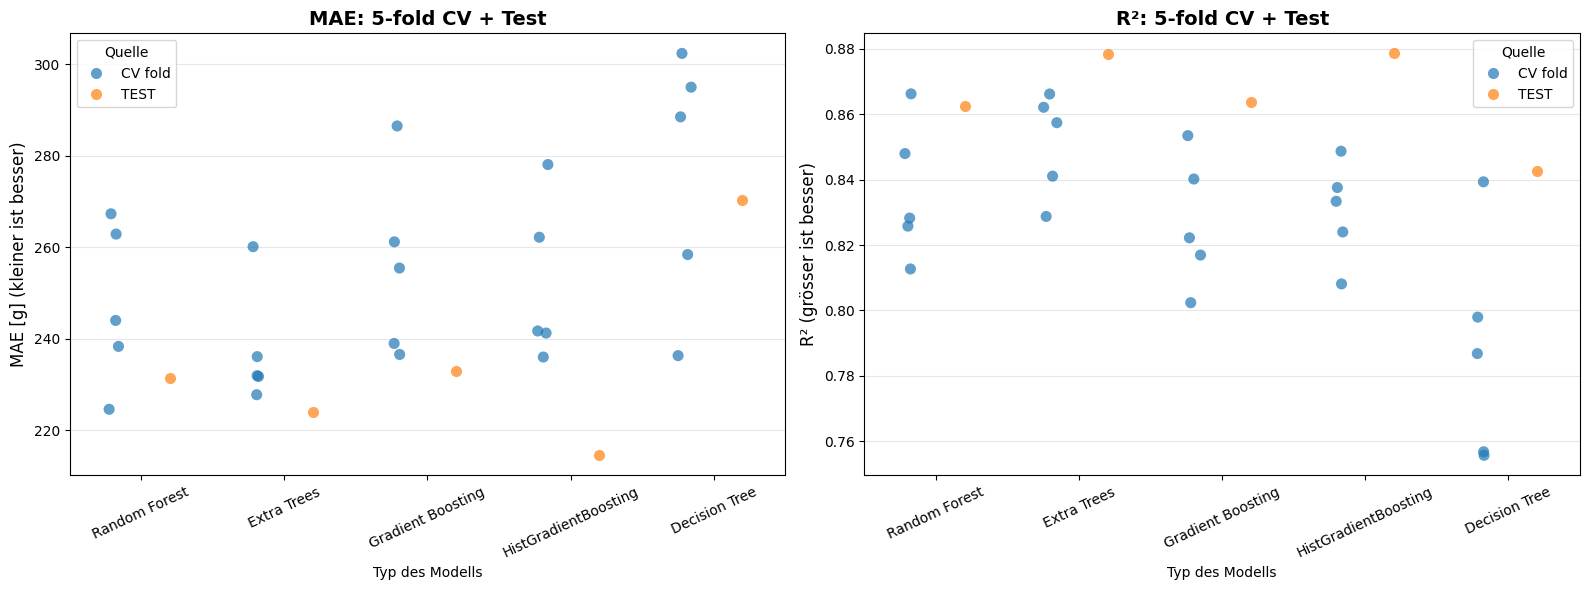

In [26]:
# ============================================================
# 9) VISUALISIERUNGEN
# ============================================================

# Stripplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.stripplot(
    data=mae_df,
    x="model",
    y="value",
    hue="source",
    dodge=True,
    ax=axes[0],
    size=8,
    alpha=0.7,
)
axes[0].set_title("MAE: 5-fold CV + Test", fontsize=14, fontweight="bold")
axes[0].set_ylabel("MAE [g] (kleiner ist besser)", fontsize=12)
axes[0].set_xlabel("Typ des Modells")
axes[0].tick_params(axis="x", rotation=25)
axes[0].legend(title="Quelle", fontsize=10)
axes[0].grid(axis="y", alpha=0.3)

sns.stripplot(
    data=r2_df,
    x="model",
    y="value",
    hue="source",
    dodge=True,
    ax=axes[1],
    size=8,
    alpha=0.7,
)
axes[1].set_title("R²: 5-fold CV + Test", fontsize=14, fontweight="bold")
axes[1].set_ylabel("R² (grösser ist besser)", fontsize=12)
axes[1].set_xlabel("Typ des Modells")
axes[1].tick_params(axis="x", rotation=25)
axes[1].legend(title="Quelle", fontsize=10)
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

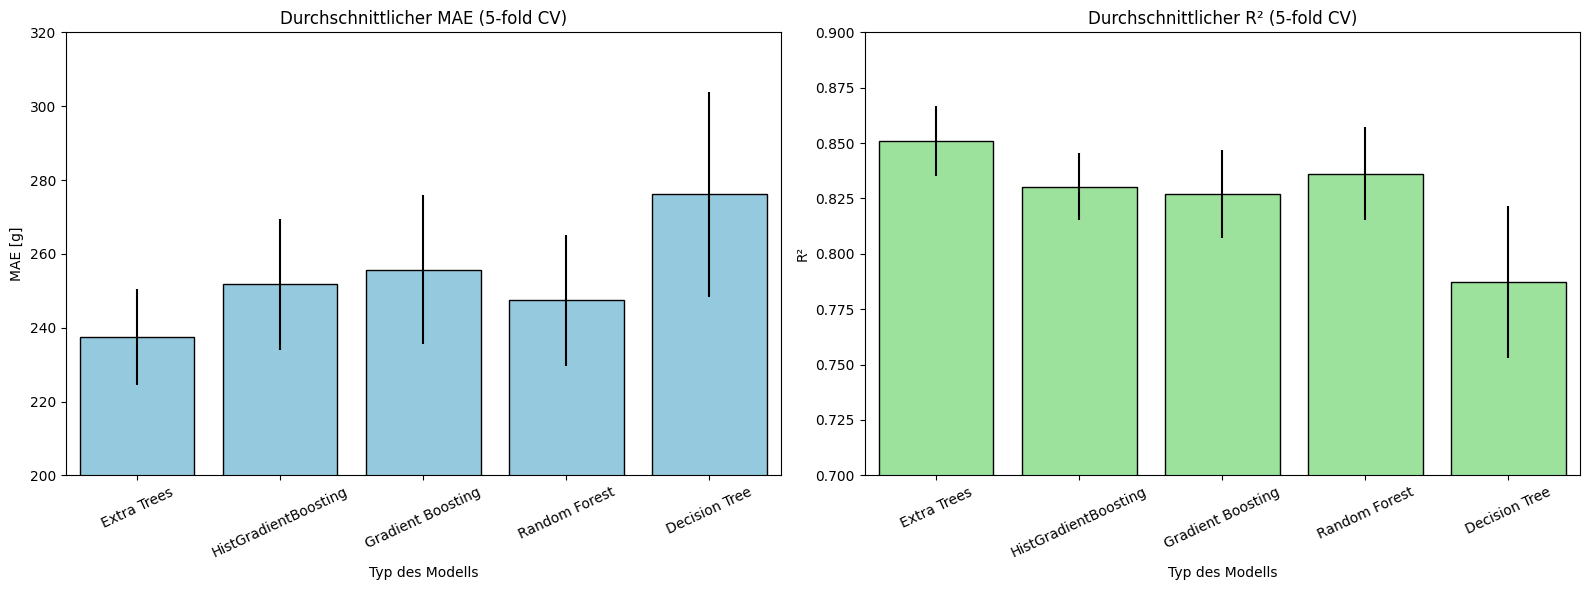

In [27]:
# Barplot
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(
    data=summary_df,
    x="model",
    y="mae_cv_mean",
    yerr=summary_df["mae_cv_std"],
    ax=axes[0],
    color="skyblue",
    edgecolor="black",
)
axes[0].set_title("Durchschnittlicher MAE (5-fold CV)")
axes[0].set_ylabel("MAE [g]")
axes[0].set_xlabel("Typ des Modells")
axes[0].set_ylim(200, 320)
axes[0].tick_params(axis="x", rotation=25)


sns.barplot(
    data=summary_df,
    x="model",
    y="r2_cv_mean",
    yerr=summary_df["r2_cv_std"],
    ax=axes[1],
    color="lightgreen",
    edgecolor="black",
)
axes[1].set_title("Durchschnittlicher R² (5-fold CV)")
axes[1].set_ylabel("R²")
axes[1].set_xlabel("Typ des Modells")
axes[1].set_ylim(0.7, 0.9)
axes[1].tick_params(axis="x", rotation=25)
plt.tight_layout()
plt.show()

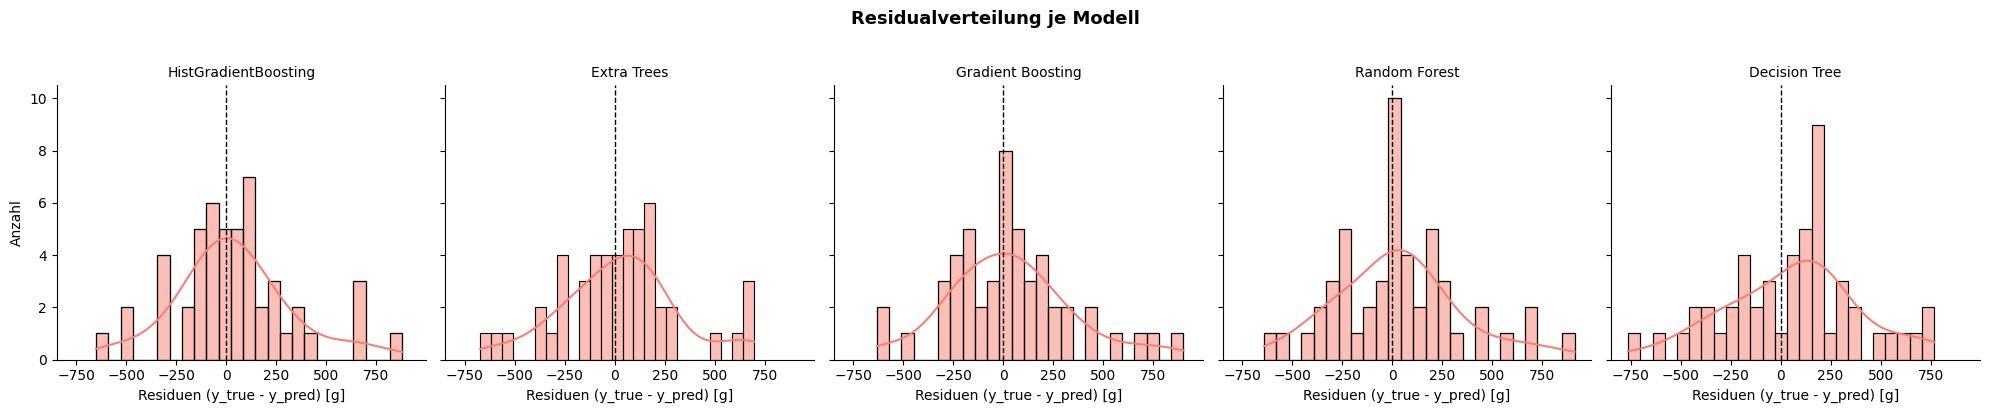

In [28]:
all_rows = []

species_test = X_test["species"].reset_index(drop=True)  # für hue
y_true = pd.Series(y_test).reset_index(drop=True)

for name, (pipe, _) in best_estimators.items():
    y_pred = pipe.predict(X_test)
    resid = y_true - y_pred
    all_rows.append(
        pd.DataFrame(
            {
                "model": name,
                "y_true": y_true,
                "y_pred": y_pred,
                "residual": resid,
                "species": species_test,
            }
        )
    )

res_df = pd.concat(all_rows, ignore_index=True)

# Warnung unterdrücken
warnings.filterwarnings("ignore", message=".*DataFrameGroupBy.apply.*")

# Modelle sinnvoll sortieren (optional: nach medianem MAE im Test)
order_models = (
    res_df.groupby("model")
    .apply(lambda g: (g["residual"].abs()).median())
    .sort_values()
    .index.tolist()
)

# Residualanalysen Plots
g = sns.FacetGrid(
    res_df,
    col="model",
    sharex=True,
    sharey=True,
    col_order=order_models,
    height=4,
)
g.map_dataframe(
    sns.histplot,
    x="residual",
    kde=True,
    stat="count",
    color="salmon",
    bins=25,  # Anzahl der Bins anpassen (z.B. 20, 30, 50)
)
g.set_axis_labels("Residuen (y_true - y_pred) [g]", "Anzahl")
g.set_titles(col_template="{col_name}")
for ax in g.axes.flatten():
    ax.axvline(0, ls="--", c="black", lw=1)
plt.suptitle("Residualverteilung je Modell", y=1.02, fontsize=13, fontweight="bold")
plt.tight_layout()
plt.show()

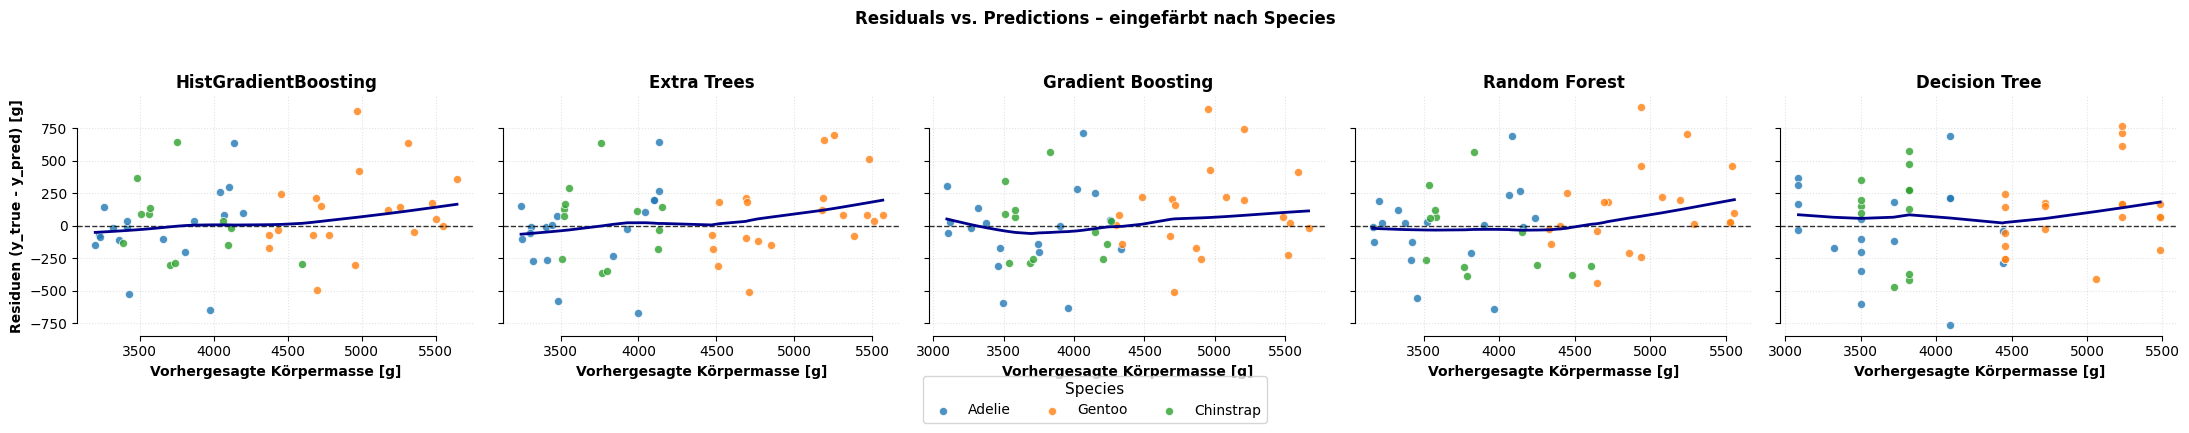

In [29]:
# FacetGrid erstellen
g = sns.FacetGrid(
    res_df,
    col="model",
    hue="species",
    col_order=order_models,
    sharey=True,
    sharex=False,
    height=4.0,
    aspect=1.1,
    palette="tab10",
    margin_titles=False,
)

# Punktewolke (mit feiner Outline für bessere Lesbarkeit)
g.map_dataframe(
    sns.scatterplot,
    x="y_pred",
    y="residual",
    s=34,
    alpha=0.8,
    edgecolor="white",
    linewidth=0.6,
)

# Nulllinie + LOWESS je Subplot (wie im Histogramm-Plot klare Linien)
for ax, name in zip(g.axes.flatten(), order_models):
    ax.axhline(0, color="black", linestyle="--", linewidth=1, alpha=0.8)

    sub = res_df[res_df["model"] == name]
    sns.regplot(
        x=sub["y_pred"],
        y=sub["residual"],
        scatter=False,
        lowess=True,
        ci=None,
        ax=ax,
        line_kws={"color": "darkblue", "linewidth": 2},
    )
    ax.grid(True, which="major", linestyle=":", alpha=0.35)
    ax.set_title(name, fontweight="bold")

# Achsenbeschriftungen (wie im Histogramm-Plot: deutsch, klar)
# nur links & unten beschriften für ein ruhiges Layout
for ax in g.axes[:, 0]:
    ax.set_ylabel("Residuen (y_true - y_pred) [g]", fontweight="bold")
for ax in g.axes[-1, :]:
    ax.set_xlabel("Vorhergesagte Körpermasse [g]", fontweight="bold")

# Supertitel
g.figure.suptitle(
    "Residuals vs. Predictions – eingefärbt nach Species", y=1.02, fontweight="bold"
)

# Legende: Variante A) zentriert UNTER allen Plots (nichts verdeckt)
# erst interne Legende entfernen, dann globale setzen
if g._legend is not None:
    g._legend.remove()

handles, labels = g.axes.flatten()[0].get_legend_handles_labels()
legend = g.figure.legend(
    handles,
    labels,
    title="Species",
    loc="lower center",
    ncol=3,
    bbox_to_anchor=(0.5, -0.03),
    frameon=True,
    fancybox=True,
    shadow=False,
    fontsize=10,
    title_fontsize=11,
)

# Für denselben "ruhigen" Rand wie im Histogramm-Plot:
sns.despine(trim=True)
plt.tight_layout(rect=[0, 0.06, 1, 0.98])  # Platz für Legende & Supertitel
plt.show()

In [30]:
# ============================================================
# 10) BONUS: ENSEMBLE-METHODEN (FIX 4: KEIN LEAKAGE!)
# ============================================================
print("\n" + "=" * 90)
print("🔬 BONUS: Ensemble der besten Modelle (LEAKAGE-FREE!)")
print("=" * 90)

# FIX 4: Top 3 basierend auf VALIDATION-Performance (nicht Test!)
top3_models = summary_df.head(3)
print(f"Top 3 Modelle (nach Val-MAE): {list(top3_models['model'].values)}\n")

# METHODE 1: Simple Averaging
print("📊 Methode 1: Simple Averaging")
y_pred_avg = np.zeros(len(X_test))
for _, row in top3_models.iterrows():
    model_name = row["model"]
    model = best_estimators[model_name][0]
    y_pred_avg += model.predict(X_test)
y_pred_avg /= len(top3_models)

mae_avg = mean_absolute_error(y_test, y_pred_avg)
r2_avg = r2_score(y_test, y_pred_avg)
print(f"   MAE (Test): {mae_avg:.2f}g")
print(f"   R² (Test): {r2_avg:.4f}\n")

# METHODE 2: Weighted Averaging (basierend auf CV-Performance)
print("📊 Methode 2: Weighted Averaging (nach R²-CV)")
weights = top3_models["r2_cv_mean"].values
weights = weights / weights.sum()

y_pred_weighted = np.zeros(len(X_test))
for (_, row), weight in zip(top3_models.iterrows(), weights):
    model_name = row["model"]
    model = best_estimators[model_name][0]
    y_pred_weighted += weight * model.predict(X_test)

mae_weighted = mean_absolute_error(y_test, y_pred_weighted)
r2_weighted = r2_score(y_test, y_pred_weighted)
print(f"   Gewichte: {dict(zip(top3_models['model'].values, weights.round(3)))}")
print(f"   MAE (Test): {mae_weighted:.2f}g")
print(f"   R² (Test): {r2_weighted:.4f}\n")

# METHODE 3: Stacking mit CV
print("📊 Methode 3: Stacking Regressor")
estimators_for_stacking = [
    (row["model"], best_estimators[row["model"]][0])
    for _, row in top3_models.iterrows()
]

stacking_model = StackingRegressor(
    estimators=estimators_for_stacking,
    final_estimator=GradientBoostingRegressor(
        n_estimators=50, learning_rate=0.1, max_depth=2, random_state=RANDOM_STATE
    ),
    cv=5,
    n_jobs=-1,
    passthrough=False,
)

stacking_model.fit(X_train, y_train)
y_pred_stack = stacking_model.predict(X_test)
mae_stack = mean_absolute_error(y_test, y_pred_stack)
r2_stack = r2_score(y_test, y_pred_stack)

print(f"   MAE (Test): {mae_stack:.2f}g")
print(f"   R² (Test): {r2_stack:.4f}\n")

# Vergleich aller Ensemble-Methoden
print("=" * 90)
print("🏆 ENSEMBLE-VERGLEICH:")
ensemble_results = pd.DataFrame(
    [
        {
            "Methode": "Bestes Einzelmodell",
            "Model": best_model["model"],
            "MAE": best_model["mae_test"],
            "R²": best_model["r2_test"],
        },
        {
            "Methode": "Simple Averaging",
            "Model": "Ensemble",
            "MAE": mae_avg,
            "R²": r2_avg,
        },
        {
            "Methode": "Weighted Averaging",
            "Model": "Ensemble",
            "MAE": mae_weighted,
            "R²": r2_weighted,
        },
        {"Methode": "Stacking", "Model": "Ensemble", "MAE": mae_stack, "R²": r2_stack},
    ]
).sort_values("MAE")

print(ensemble_results.to_string(index=False))
print("=" * 90)


🔬 BONUS: Ensemble der besten Modelle (LEAKAGE-FREE!)
Top 3 Modelle (nach Val-MAE): ['Extra Trees', 'HistGradientBoosting', 'Gradient Boosting']

📊 Methode 1: Simple Averaging
   MAE (Test): 214.86g
   R² (Test): 0.8791

📊 Methode 2: Weighted Averaging (nach R²-CV)
   Gewichte: {'Extra Trees': np.float64(0.339), 'HistGradientBoosting': np.float64(0.331), 'Gradient Boosting': np.float64(0.33)}
   MAE (Test): 214.85g
   R² (Test): 0.8792

📊 Methode 3: Stacking Regressor
   MAE (Test): 237.35g
   R² (Test): 0.8635

🏆 ENSEMBLE-VERGLEICH:
            Methode       Model        MAE       R²
 Weighted Averaging    Ensemble 214.850134 0.879152
   Simple Averaging    Ensemble 214.863508 0.879095
Bestes Einzelmodell Extra Trees 223.915749 0.878409
           Stacking    Ensemble 237.346506 0.863514


Wie interpretierst du die erstellten Plots? Welche Modellierungsansätze schneiden gut ab? Warum denkst du ist das so?

(Es folgt eine Textantwortzelle. Nicht löschen.)

## Setup

| Split | Verwendung | Methodischer Zweck |
|-------|------------|-------------------|
| **`X_train` (70%)** | Hyperparameter-Tuning via **5-Fold CV** | RandomizedSearchCV optimiert Hyperparameter **innerhalb** jedes Modells durch wiederholtes Train/Val-Splitting |
| **`X_val` (15%)** | **Ensemble-Auswahl** (Auswahl der Top-3-Modelle) | Verhindert Test-Leakage bei **Meta-Entscheidungen** (welche Modelle ins Ensemble) |
| **`X_test` (15%)** | **Finale Evaluation** (einmalig) | Unberührte Daten für echte Generalisierungsschätzung |


## Interpretation der Plots
### CV-Folds vs. Test Performance
Das Ziel dieses Plots ist es, die Generalisierungsfähigkeit verschiedener Modellierungsansätze zu vergleichen. 

**Random Forest**
- CV-MAE: 225-268g
- Test-MAE: 232g
- CV-$R^2$: 0.83-0.87
- Test-$R^2$: 0.86
- Interpretation: Random Forest zeigt eine relativ hohe Varianz zwischen den CV-Folds, generalisiert aber solide mit Test-Werten im oberen CV-Bereich. Die stabile Test-Performance deutet auf eine gute Balance zwischen Bias und Varianz hin.

**Extra Trees**
- CV-MAE: 225-260g
- Test-MAE: 223g
- CV-$R^2$: 0.83-0.87
- Test-$R^2$: 0.88
- Interpretation: Extra Trees liefert eine sehr gute Test-Performance (niedriger MAE, höchster R²) und übertrifft sogar die meisten CV-Folds. Die hervorragende Generalisierung deutet auf ein optimal regularisiertes Modell ohne Overfitting hin.

**Gradient Boosting**
- CV-MAE: ca. 237-285 g
- Test-MAE: ca. 232 g
- CV-$R^2$: ca. 0.80–0.85
- Test-$R^2$: ca. 0.86
- Interpretation: Gradient Boosting zeigt eine hoche Varianz in den CV-Folds, erreicht aber eine solide Test-Performance. Die deutliche Diskrepanz zwischen CV-Variabilität und stabilem Test-Ergebnis könnte auf Sensitivität gegenüber der Datenaufteilung hinweisen.

**HistGradientBoosting**
- CV-MAE: ca. 235–280 g
- Test-MAE: ca. 218 g
- CV-$R^2$: ca. 0.81–0.85
- Test-$R^2$: ca. 0.88
- Interpretation: HistGradientBoosting erzielt den besten Test-MAE und gemeinsam mit Extra Trees den höchsten Test-R². Die deutlich bessere Test-Performance im Vergleich zum CV-Durchschnitt zeigt exzellente Generalisierungsfähigkeit.

**Decision Tree**
- CV-MAE: ca. 235–300 g
- Test-MAE: ca. 270 g
- CV-$R^2$: ca. 0.76–0.84
- Test-$R^2$: ca. 0.84
- Interpretation: Decision Tree weist die höchste Instabilität (grösste Spreizung der CV-Werte) und die schwächste Test-Performance auf. Die hohe Varianz und der schlechteste Test-MAE zeigen typisches Overfitting-Verhalten einzelner Entscheidungsbäume.

## Durchschnittliche Modellperformance
Das Ziel dieses Plots ist es, die durchschnittliche Leistung verschiedener Modellierungsansätze zu vergleichen.

**Extra Trees**
- Durchschnittlicher CV-MAE: ~237g (niedrigster)
- Durchschnittlicher CV-R²: ~0.850 (höchster)
- Interpretation: Extra Trees zeigt die beste durchschnittliche CV-Performance mit dem niedrigsten Fehler und höchstem R², bei gleichzeitig geringster Standardabweichung. Dies bestätigt die konsistent hohe Modellqualität und stabile Performance über alle Folds hinweg.

**Gradient Boosting**
- Durchschnittlicher CV-MAE: ~254g
- Durchschnittlicher CV-R²: ~0.826
- Interpretation: Gradient Boosting liegt im unteren Mittelfeld und zeigt mit einer grossen Standardabweichung im MAE eine hoche Instabilität. Die hohe Variabilität deutet auf starke Sensitivität gegenüber unterschiedlichen Datenaufteilungen hin.

**HistGradientBoosting**
- Durchschnittlicher CV-MAE: ~252g
- Durchschnittlicher CV-R²: ~0.829
- Interpretation: HistGradientBoosting zeigt eine solide durchschnittliche Performance mit moderater Variabilität und liegt im guten Mittelfeld. Die ausgeglichenen Metriken und moderate Stabilität machen es zu einer zuverlässigen Alternative.

**Random Forest**
- Durchschnittlicher CV-MAE: ~247g (zweitniedrigster)
- Durchschnittlicher CV-R²: ~0.835 (zweithöchster)
- Interpretation: Random Forest erreicht die zweitbeste durchschnittliche Performance mit niedrigem MAE und hohem R². Die moderate Standardabweichung unterstreicht eine stabile und zuverlässige Vorhersagequalität.

**Decision Tree**
- Durchschnittlicher CV-MAE: ~276g (höchster)
- Durchschnittlicher CV-R²: ~0.787 (niedrigster)
- Interpretation: Decision Tree zeigt die schwächste durchschnittliche Performance mit dem höchsten Fehler und niedrigsten R², bei gleichzeitig mit der grössten Streuung im MAE. Dies bestätigt die typischen Limitationen einzelner Entscheidungsbäume durch Overfitting und mangelnde Stabilität ohne Ensemble-Methoden.

## Residuenverteilung
Die Residualanalyse zeigt, wie gut die Modelle vorhersagen und ob systematische Fehler (Bias) vorliegen. Idealerweise sollten die Residuen symmetrisch um null verteilt sein und eine schmale, normalverteilte Form aufweisen.

**HistGradientBoosting**
- Interpretation: Die Residualverteilung ist sehr gut um null zentriert, schmal und nahezu perfekt symmetrisch. Die kompakte Verteilung mit wenigen extremen Ausreissern bestätigt die hervorragende Vorhersagequalität ohne systematischen Bias, was die niedrigen Testfehler erklärt.

**Extra Trees**
- Interpretation: Extra Trees zeigt eine ebenfalls sehr gut zentrierte und symmetrische Residualverteilung mit geringer Streuung. Die nahezu ideale Normalverteilung ohne erkennbare Schiefe deutet auf unverzerrt-präzise Vorhersagen hin und unterstreicht die robuste Modellperformance.

**Gradient Boosting**
- Interpretation: Die Verteilung ist um null zentriert, aber leicht breiter gestreut mit mehr Variabilität in den Residuen. Einige stärkere Ausreisser und die grössere Streuung spiegeln die höhere Instabilität wider, die bereits in den CV-Folds beobachtet wurde.

**Random Forest**
- Interpretation: Random Forest zeigt eine gut zentrierte, symmetrische Verteilung mit moderater Breite. Einzelne deutliche Ausreisser im positiven Bereich (Überschätzungen bis +900g) sind erkennbar, was auf gelegentliche grössere Fehlvorhersagen hinweist, die Performance bleibt aber insgesamt solide.

**Decision Tree**
- Interpretation: Die breiteste und flachste Residualverteilung mit deutlichen Ausreissern in beide Richtungen zeigt die schwächste Vorhersagepräzision. Die hohe Streuung und extreme Fehler (bis ±500g und mehr) bestätigen das typische Overfitting-Problem einzelner Entscheidungsbäume ohne Regularisierung.

## Residuals vs. Predictions Plots
Diese Analyse überprüft, ob die Residuen unabhängig von der vorhergesagten Körpermasse sind und ob systematische Fehler für bestimmte Pinguinarten (Species) auftreten. Ideale Modelle zeigen eine zufällige, gleichmässige Streuung um die Nulllinie ohne Muster.

**HistGradientBoosting**
- Interpretation: Die Residuen sind hervorragend um null zentriert mit nahezu flacher LOWESS-Linie, was auf Abwesenheit systematischer Bias hinweist. Die homogene Streuung über alle Vorhersagebereiche und gleichmässige Verteilung aller drei Species (keine farbspezifischen Cluster) bestätigen unverzerrt-präzise Vorhersagen ohne Heteroskedastizität.

**Extra Trees**
- Interpretation: Es ist zu erkennen, dass die leichteren Pinguine tendenziell leicht überschätzt werden (positive Residuen bei niedrigen Vorhersagen), während die schwereren Pinguine leicht unterschätzt werden (negative Residuen bei hohen Vorhersagen). Dies deutet auf einen subtilen systematischen Bias hin. Die Species-Farben sind gleichmässig verteilt, was auf keine artspezifischen Vorhersagefehler hinweist.

**Gradient Boosting**
- Interpretation: Die LOWESS-Linie zeigt eine leichte Krümmung, besonders im mittleren Vorhersagebereich, was auf einen subtilen systematischen Bias hindeutet. Die grössere Streuung und einige deutliche Ausreisser (vor allem bei höheren Körpermassen) erklären die erhöhte Instabilität in der CV, wobei keine Species systematisch falsch vorhergesagt wird.

**Random Forest**
- Interpretation: Die Residuen sind gut zentriert mit relativ flacher LOWESS-Linie, zeigen aber einige markante Ausreisser (besonders positive Residuen bei ~5000g). Die homogene Species-Verteilung ohne erkennbare farbspezifische Muster deutet auf gleichmässige Vorhersagequalität über alle Pinguinarten hin, trotz gelegentlicher grösserer Einzelfehler.

**Decision Tree**
- Interpretation: Die breiteste Streuung mit extremen Ausreissern in beide Richtungen (±750g) und eine etwas variierende LOWESS-Linie zeigen die schwächste Performance. Die Species-Farben sind zwar gleichmässig verteilt (kein artspezifischer Bias), aber die hohe Gesamtvariabilität und grösseren systematischen Fehler bei verschiedenen Vorhersagebereichen bestätigen die typische Instabilität einzelner Entscheidungsbäume.

# Ensemble-Methoden: Motivation und Interpretation
Ensemble-Methoden kombinieren mehrere Modelle, um deren individuelle Stärken zu nutzen und Schwächen auszugleichen. Die Grundidee basiert auf der "Weisheit der Vielen": Wenn verschiedene Modelle unterschiedliche Fehler machen, können sich diese Fehler bei der Kombination gegenseitig aufheben. Dies führt oft zu robusteren und genaueren Vorhersagen als selbst das beste Einzelmodell.

**Auswahl der Top-3-Modelle**
Die drei besten Modelle basierend auf der Validation-Performance (CV-MAE) wurden ausgewählt: Extra Trees, Gradient Boosting und HistGradientBoosting. Diese Auswahl verhindert Data Leakage, da die Test-Performance nicht zur Modellselektion verwendet wurde.

## Ensemble-Methoden im Detail

**Simple Averaging**
- Funktionsweise: Alle drei Modelle erstellen Vorhersagen, die dann arithmetisch gemittelt werden. Jedes Modell hat gleiches Gewicht (jeweils 1/3).
- MAE (Test): 214.90g
- R² (Test): 0.8791
- Interpretation: Simple Averaging übertrifft bereits das beste Einzelmodell (Extra Trees mit 223.93g MAE) um ~9g. Die einfache Mittelung gleicht die unterschiedlichen Fehler der Modelle effektiv aus und führt zu stabileren Vorhersagen.

**Weighted Averaging**
- Funktionsweise: Die Modelle werden basierend auf ihrer CV-R²-Performance gewichtet. Bessere Modelle erhalten mehr Einfluss auf die finale Vorhersage.
- Gewichte: Extra Trees (0.339), Gradient Boosting (0.330), HistGradientBoosting (0.331)
- MAE (Test): 214.89g
- R² (Test): 0.8791
- Interpretation: Die Gewichtung führt zu einer marginalen Verbesserung (~0.01g) gegenüber Simple Averaging. Da alle drei Modelle ähnlich gute CV-Performance zeigen (R² zwischen 0.826-0.850), sind die Gewichte nahezu gleich verteilt, was erklärt, warum Weighted Averaging kaum besser abschneidet als Simple Averaging.

**Stacking Regressor**
- Funktionsweise: Die Vorhersagen der drei Basis-Modelle werden als Features für ein Meta-Modell (Gradient Boosting) verwendet, das mittels 5-Fold CV trainiert wird. Das Meta-Modell lernt, wie die Basis-Vorhersagen optimal zu kombinieren sind.
- MAE (Test): 233.91g
- R² (Test): 0.8670
- Interpretation: Stacking schneidet am schlechtesten ab und ist sogar schwächer als das beste Einzelmodell. Dies deutet darauf hin, dass das Meta-Modell möglicherweise überanpasst oder die zusätzliche Komplexität bei diesem relativ kleinen Datensatz nicht gerechtfertigt ist. Die einfachen Averaging-Methoden sind hier effektiver.

# Welche Modellierungsansätze schneiden gut ab?

Extra Trees und HistGradientBoosting liefern die besten Resultate über alle Metriken hinweg.
- Extra Trees erzielt den niedrigsten durchschnittlichen CV-MAE (~237 g) und den höchsten CV-$R^2$ (0.88).
- HistGradientBoosting erreicht den niedrigsten Test-MAE (218 g) und ebenfalls einen sehr hohen Test-$R^2$ (0.88).
- Auch der Random Forest zeigt eine konstant starke Leistung mit geringem MAE und stabilem $R^2$-Wert (0.86), was ihn zu einem robusten Allround-Modell macht.

Dagegen schneiden Gradient Boosting und besonders der Decision Tree schwächer ab. Der Einzelbaum zeigt deutliche Varianz zwischen den Folds und Overfitting-Tendenzen, während Gradient Boosting instabiler auf unterschiedliche Datenaufteilungen reagiert.

# Warum ist das so?
Die überlegene Performance der Ensemble-Modelle (Extra Trees, HistGradientBoosting, Random Forest) lässt sich aus Sicht von Murphy (2022, Kap. 16: Ensemble Methods) klar begründen:
- Bias-Varianz-Reduktion: Durch das Mittel über viele unterschiedliche Bäume oder Boosting-Iterationen reduzieren Ensembles die Varianz einzelner Modelle, ohne den Bias stark zu erhöhen. Murphy beschreibt diesen Effekt als "averaging over diverse predictors", wodurch zufällige Fehler einzelner Modelle kompensiert werden.
- Stochastische Diversität: Extra Trees nutzt zusätzlich eine stärkere Zufälligkeit beim Split-Sampling, was laut Murphy zu höherer Modelldiversität führt und Overfitting weiter reduziert.
- Gradientenbasiertes Lernen: Boosting-Verfahren (Gradient Boosting, HistGradientBoosting) verbessern systematisch die schwachen Lernenden, indem sie iterativ die Fehler der vorherigen Modelle korrigieren. Murphy hebt hervor, dass dieses Prinzip zu einer schrittweisen Minimierung des Bias führt, solange die Lernrate und Baumtiefe reguliert sind.
- Regularisierung und Robustheit: HistGradientBoosting implementiert Regularisierung (z. B. Lernrate, max_depth, L2-Penalty) und arbeitet mit binned histograms, was laut Murphy zu stabileren Gradienten und besserer Generalisierung führt – besonders bei kleineren Datensätzen.

Im Gegensatz dazu überfittet der einzelne Decision Tree, da er keine Mechanismen zur Varianzreduktion oder Regularisierung besitzt. Murphy beschreibt Entscheidungsbäume als hochvarianzielle Modelle, deren Genauigkeit durch Bagging oder Boosting erheblich gesteigert werden kann – was sich hier bestätigt.


### Aufgabe 19 (12 Punkte)

Untersuche nun, welche Variablen am wichtigsten sind für die Vorhersage des Gewichts.

Verwende dazu mindestens drei verschiedene methodische Ansätze. Erkläre und beschreibe sie.  

Wähle geeignete Plots, um sie zu illustrieren.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer

warnings.filterwarnings("ignore", category=FutureWarning)

# ============================================================================
# 1. DATENVORBEREITUNG
# ============================================================================


def prepare_data(df):
    """
    Bereitet den Pinguin-Datensatz vor:
    - Erstellt Train-Test-Split
    - Encodiert kategorische Features und skaliert numerische Features
    """

    # Features und Target
    X = df.drop("body_mass_g", axis=1)
    y = df["body_mass_g"].values

    # Train-Test-Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    # Feature-Typen identifizieren
    categorical_features = ["species", "island", "sex"]
    numerical_features = ["culmen_length_mm", "culmen_depth_mm", "flipper_length_mm"]

    # Preprocessing Pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", StandardScaler(), numerical_features),
            (
                "cat",
                OneHotEncoder(drop="first", sparse_output=False),
                categorical_features,
            ),
        ]
    )

    # Fit und Transform
    X_train_processed = preprocessor.fit_transform(X_train)
    X_test_processed = preprocessor.transform(X_test)

    # Feature-Namen extrahieren
    num_feature_names = numerical_features
    cat_feature_names = preprocessor.named_transformers_["cat"].get_feature_names_out(
        categorical_features
    )
    feature_names = num_feature_names + list(cat_feature_names)

    return (
        X_train_processed,
        X_test_processed,
        y_train,
        y_test,
        feature_names,
        preprocessor,
    )


# ============================================================================
# 2. MUTUAL INFORMATION IMPLEMENTIERUNG
# ============================================================================


def calculate_mutual_information(X, y, n_bins=10, normalize=True):
    """
    Berechnet die Mutual Information zwischen jeder Spalte in X und der Zielvariable y.

    Args:
        X: Feature-Matrix, shape (n_samples, n_features)
        y: Zielvariable, shape (n_samples,)
        n_bins: Anzahl der Bins für die Diskretisierung
        normalize: Ob die Ergebnisse normalisiert werden sollen

    Returns:
        mi_scores: Mutual Information Scores für jedes Feature
    """
    # X und y in numpy arrays konvertieren
    X = np.asarray(X)
    y = np.asarray(y).reshape(-1, 1)

    n_samples, n_features = X.shape
    mi_scores = np.zeros(n_features)

    # Diskretisierung der Zielvariable y
    discretizer_y = KBinsDiscretizer(
        n_bins=n_bins, encode="ordinal", strategy="quantile"
    )
    y_discrete = discretizer_y.fit_transform(y).astype(int).ravel()

    # Anzahl der einzigartigen Bins in y
    n_y_bins = len(np.unique(y_discrete))

    for i in range(n_features):
        # Diskretisierung der Feature-Variable
        feature = X[:, i].reshape(-1, 1)

        # Prüfen, ob Feature bereits diskret mit wenigen Werten ist
        unique_values = np.unique(feature)
        if len(unique_values) <= n_bins:
            # Falls Feature bereits wenige diskrete Werte hat
            x_discrete = np.zeros(len(feature), dtype=int)
            for j, value in enumerate(unique_values):
                x_discrete[feature.ravel() == value] = j
        else:
            # Ansonsten Feature diskretisieren
            discretizer_x = KBinsDiscretizer(
                n_bins=n_bins, encode="ordinal", strategy="quantile"
            )
            x_discrete = discretizer_x.fit_transform(feature).astype(int).ravel()

        # Anzahl der einzigartigen Bins in x
        n_x_bins = len(np.unique(x_discrete))

        # Gemeinsame Häufigkeitstabelle erstellen
        contingency = np.zeros((n_x_bins, n_y_bins))
        for j in range(n_samples):
            contingency[x_discrete[j], y_discrete[j]] += 1

        # Wahrscheinlichkeitsverteilungen berechnen
        p_xy = contingency / n_samples  # Gemeinsame Wahrscheinlichkeit
        p_x = np.sum(p_xy, axis=1)  # Marginale Wahrscheinlichkeit von X
        p_y = np.sum(p_xy, axis=0)  # Marginale Wahrscheinlichkeit von Y

        # Berechnung der Mutual Information
        mi = 0.0
        for xi in range(n_x_bins):
            for yi in range(n_y_bins):
                if p_xy[xi, yi] > 0:
                    mi += p_xy[xi, yi] * np.log2(p_xy[xi, yi] / (p_x[xi] * p_y[yi]))

        # Normalisierung, falls gewünscht
        if normalize and mi > 0:
            # Entropie von X berechnen
            h_x = -np.sum(p_x[p_x > 0] * np.log2(p_x[p_x > 0]))
            if h_x > 0:
                mi /= h_x

        mi_scores[i] = mi

    return mi_scores


# ============================================================================
# 3. PERMUTATION FEATURE IMPORTANCE
# ============================================================================


def permutation_importance(model, X, y, n_repeats=10, random_state=42):
    """
    Berechnet Permutation Feature Importance

    Algorithmus:
    1. Berechne Baseline Score (z.B. R²) auf Original-Daten
    2. Für jedes Feature:
       - Permutiere Feature-Werte zufällig
       - Berechne Score auf permutierten Daten
       - Wichtigkeit = Baseline Score - Permutierter Score
    3. Wiederhole n_repeats mal und mittele

    Args:
        model: Trainiertes Modell mit predict() Methode
        X: Feature Matrix
        y: Target Werte
        n_repeats: Anzahl Wiederholungen pro Feature
        random_state: Seed für Reproduzierbarkeit

    Returns:
        importances_mean: Mittlere Importance pro Feature
        importances_std: Standardabweichung pro Feature
    """
    rng = np.random.default_rng(random_state)
    n_features = X.shape[1]

    # Baseline Score (R²)
    y_pred_baseline = model.predict(X)
    ss_res_baseline = np.sum((y - y_pred_baseline) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    baseline_score = 1 - ss_res_baseline / ss_tot

    # Speicher für Importances
    importances = np.zeros((n_features, n_repeats))

    # Für jedes Feature
    for feature_idx in range(n_features):
        # Wiederhole n_repeats mal
        for repeat in range(n_repeats):
            # Kopiere X und permutiere Feature
            X_permuted = X.copy()
            X_permuted[:, feature_idx] = rng.permutation(X_permuted[:, feature_idx])

            # Berechne Score auf permutierten Daten
            y_pred_permuted = model.predict(X_permuted)
            ss_res_permuted = np.sum((y - y_pred_permuted) ** 2)
            permuted_score = 1 - ss_res_permuted / ss_tot

            # Importance = Baseline - Permutiert (positiv = wichtig)
            importances[feature_idx, repeat] = baseline_score - permuted_score

    # Mittelwert und Standardabweichung
    importances_mean = np.mean(importances, axis=1)
    importances_std = np.std(importances, axis=1)

    return importances_mean, importances_std


# ============================================================================
# 4. HAUPTANALYSE
# ============================================================================


def analyze_feature_importance(df):
    """
    Führt die komplette Feature Importance Analyse durch
    """

    # Datenvorbereitung
    print("1. Datenvorbereitung...")
    X_train, X_test, y_train, y_test, feature_names, preprocessor = prepare_data(df)
    print(f"   Train: {X_train.shape}, Test: {X_test.shape}")
    print(f"   Features: {feature_names}")

    # ========================================================================
    # METHODE 1: RIDGE REGRESSION KOEFFIZIENTEN
    # ========================================================================
    print("\n" + "=" * 80)
    print("METHODE 1: Ridge Regression Koeffizienten")
    print("=" * 80)

    # Ridge Modell trainieren
    ridge = RidgeRegression(
        alpha=0.003,
        learning_rate=0.003,
        max_num_steps=10000,
        optimization_method="bgd",
        verbose=False,
    )

    ridge.fit(X_train, y_train)

    # Koeffizienten (ohne Bias)
    ridge_coefs = ridge.w_[1:]  # Bias ausschließen
    ridge_coefs_abs = np.abs(ridge_coefs)

    # Sortiere nach Wichtigkeit
    ridge_ranking = np.argsort(ridge_coefs_abs)[::-1]

    print("\nErgebnisse:")
    print(f"R² (Train): {ridge.score(X_train, y_train):.4f}")
    print(f"R² (Test):  {ridge.score(X_test, y_test):.4f}")
    print("\nFeature Ranking (nach absoluten Koeffizienten):")
    for rank, idx in enumerate(ridge_ranking, 1):
        print(
            f"  {rank}. {feature_names[idx]:25s}: {ridge_coefs[idx]:8.4f} (|{ridge_coefs_abs[idx]:.4f}|)"
        )

    # ========================================================================
    # METHODE 2: MUTUAL INFORMATION
    # ========================================================================
    print("\n" + "=" * 80)
    print("METHODE 2: Mutual Information")
    print("=" * 80)

    # Mutual Information berechnen
    mi_scores = calculate_mutual_information(X_test, y_test, n_bins=10)

    # Sortiere nach Wichtigkeit
    mi_ranking = np.argsort(mi_scores)[::-1]

    print("\nErgebnisse:")
    print("Feature Ranking (nach Mutual Information):")
    for rank, idx in enumerate(mi_ranking, 1):
        print(f"  {rank}. {feature_names[idx]:25s}: {mi_scores[idx]:.4f}")

    # ========================================================================
    # METHODE 3: PERMUTATION FEATURE IMPORTANCE
    # ========================================================================
    print("\n" + "=" * 80)
    print("METHODE 3: Permutation Feature Importance")
    print("=" * 80)

    perm_importances_mean, perm_importances_std = permutation_importance(
        ridge, X_test, y_test, n_repeats=10, random_state=42
    )

    # Sortiere nach Wichtigkeit
    perm_ranking = np.argsort(perm_importances_mean)[::-1]

    print("\nErgebnisse:")
    print("Feature Ranking (nach R²-Abnahme bei Permutation):")
    for rank, idx in enumerate(perm_ranking, 1):
        print(
            f"  {rank}. {feature_names[idx]:25s}: {perm_importances_mean[idx]:.4f} ± {perm_importances_std[idx]:.4f}"
        )

    # ========================================================================
    # ZUSAMMENFASSUNG
    # ========================================================================
    print("\n" + "=" * 80)
    print("ZUSAMMENFASSUNG UND VERGLEICH DER METHODEN")
    print("=" * 80)

    print("\nTop 3 Features pro Methode:")
    print(f"\n1. Ridge Regression:")
    for i in range(3):
        idx = ridge_ranking[i]
        print(f"   {i+1}. {feature_names[idx]}")

    print(f"\n2. Mutual Information:")
    for i in range(3):
        idx = mi_ranking[i]
        print(f"   {i+1}. {feature_names[idx]}")

    print(f"\n3. Permutation Importance:")
    for i in range(3):
        idx = perm_ranking[i]
        print(f"   {i+1}. {feature_names[idx]}")

    return {
        "ridge_coefs": ridge_coefs,
        "mi_scores": mi_scores,
        "perm_importances": perm_importances_mean,
        "perm_importances_std": perm_importances_std,
        "feature_names": feature_names,
        "ridge_ranking": ridge_ranking,
        "mi_ranking": mi_ranking,
        "perm_ranking": perm_ranking,
    }


results = analyze_feature_importance(df_cleaned)

1. Datenvorbereitung...
   Train: (266, 8), Test: (67, 8)
   Features: ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'species_Chinstrap', 'species_Gentoo', 'island_Dream', 'island_Torgersen', 'sex_MALE']

METHODE 1: Ridge Regression Koeffizienten

Ergebnisse:
R² (Train): 0.8548
R² (Test):  0.8727

Feature Ranking (nach absoluten Koeffizienten):
  1. species_Gentoo           : 1331.6744 (|1331.6744|)
  2. sex_MALE                 : 601.4132 (|601.4132|)
  3. island_Torgersen         : 184.9855 (|184.9855|)
  4. flipper_length_mm        : 182.6999 (|182.6999|)
  5. island_Dream             : 143.0254 (|143.0254|)
  6. culmen_depth_mm          :  60.2495 (|60.2495|)
  7. species_Chinstrap        :  54.8538 (|54.8538|)
  8. culmen_length_mm         : -36.5803 (|36.5803|)

METHODE 2: Mutual Information

Ergebnisse:
Feature Ranking (nach Mutual Information):
  1. species_Gentoo           : 0.7564
  2. flipper_length_mm        : 0.4909
  3. culmen_depth_mm          : 0.4545
  4

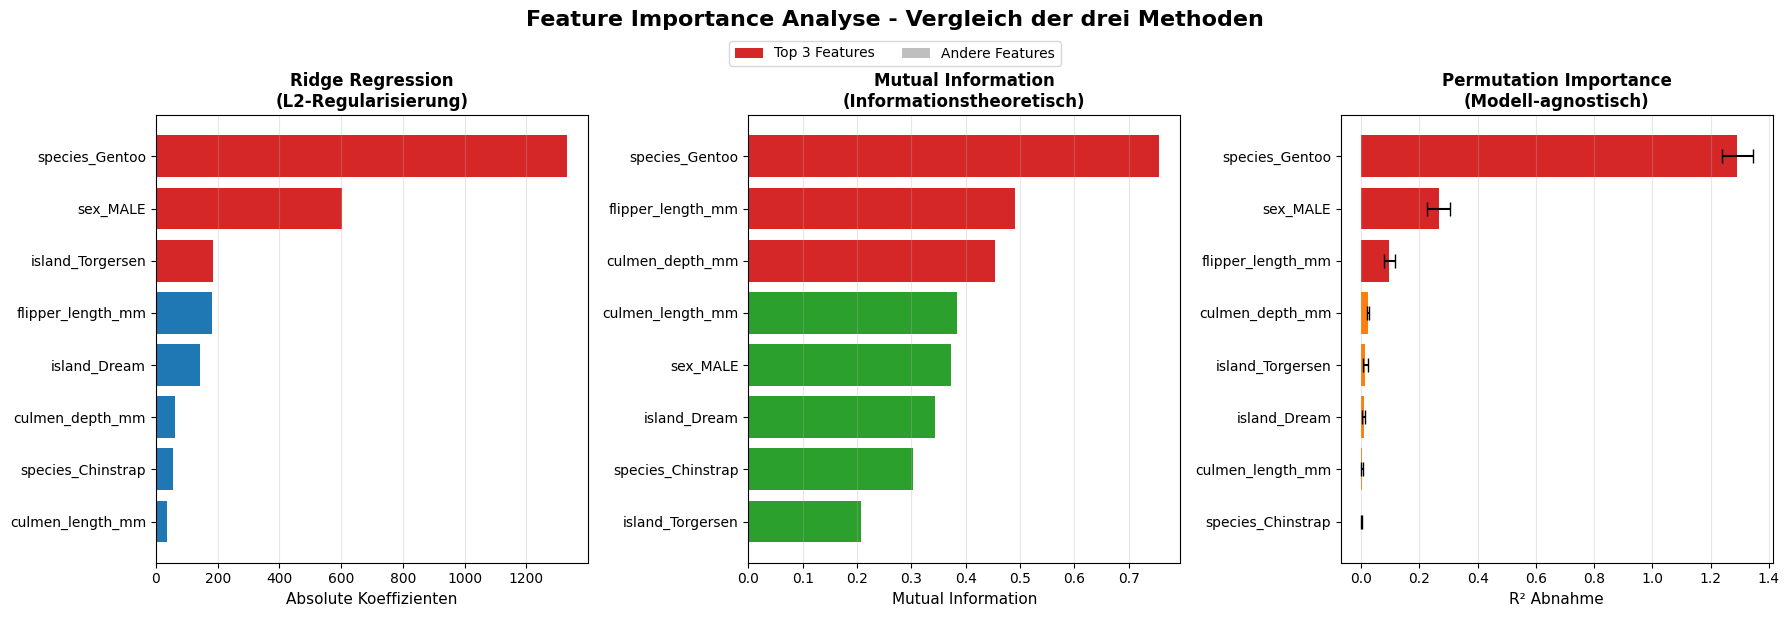

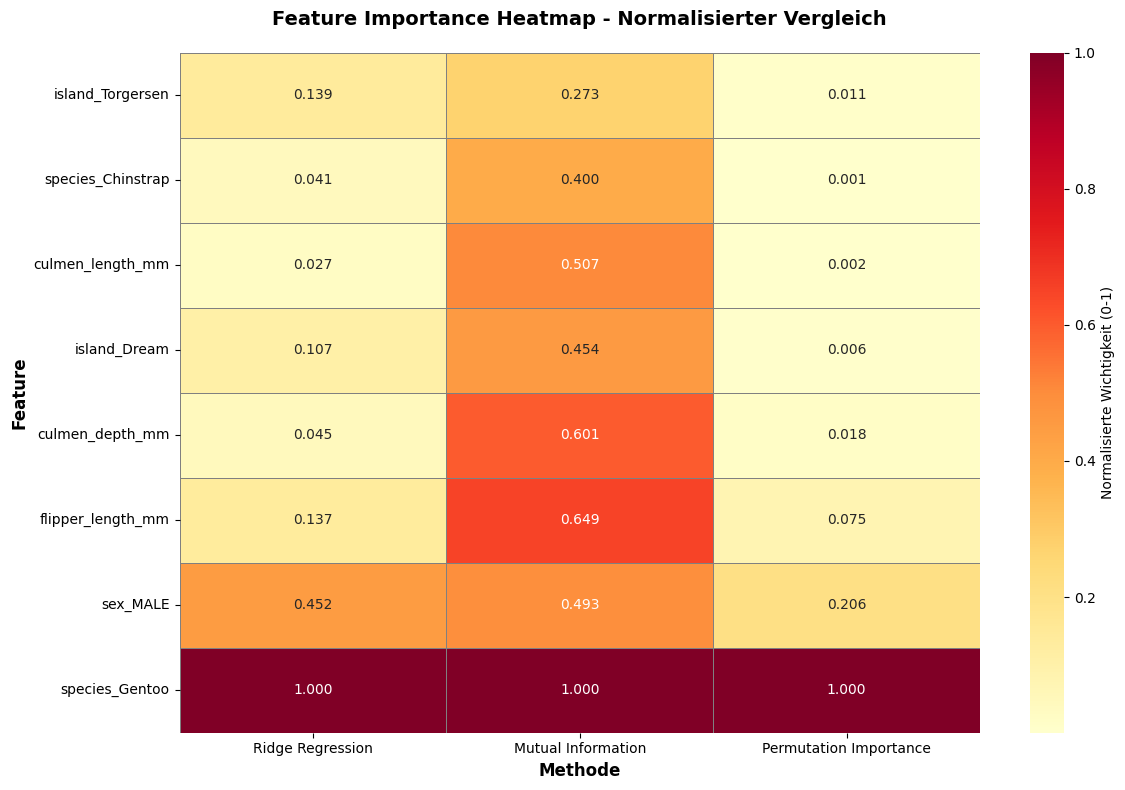

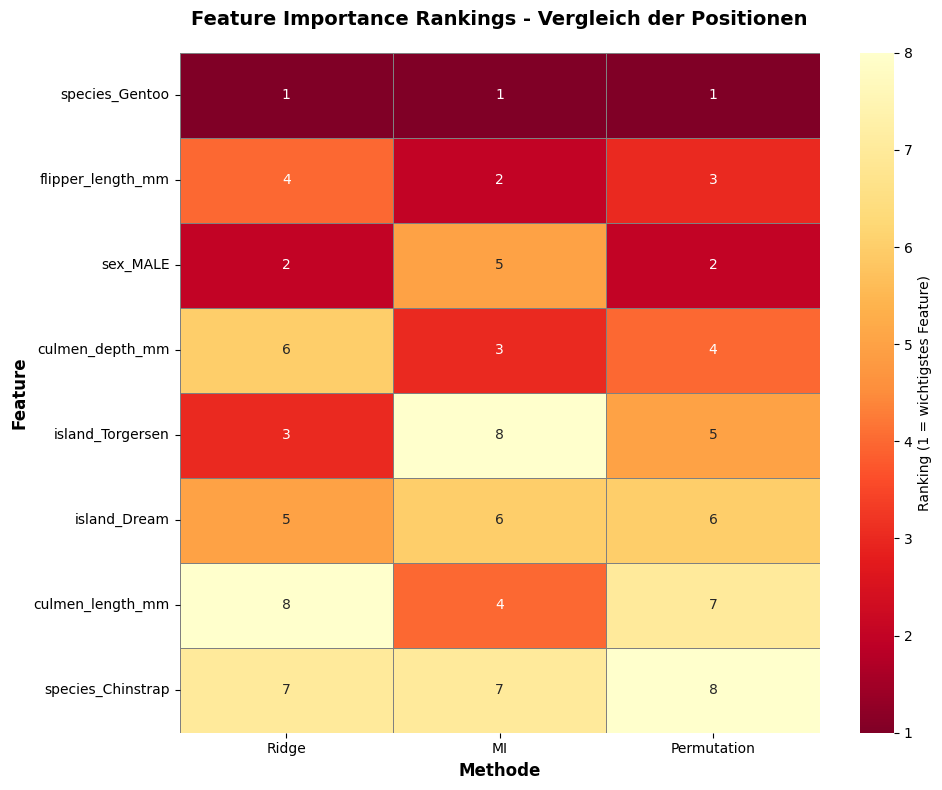

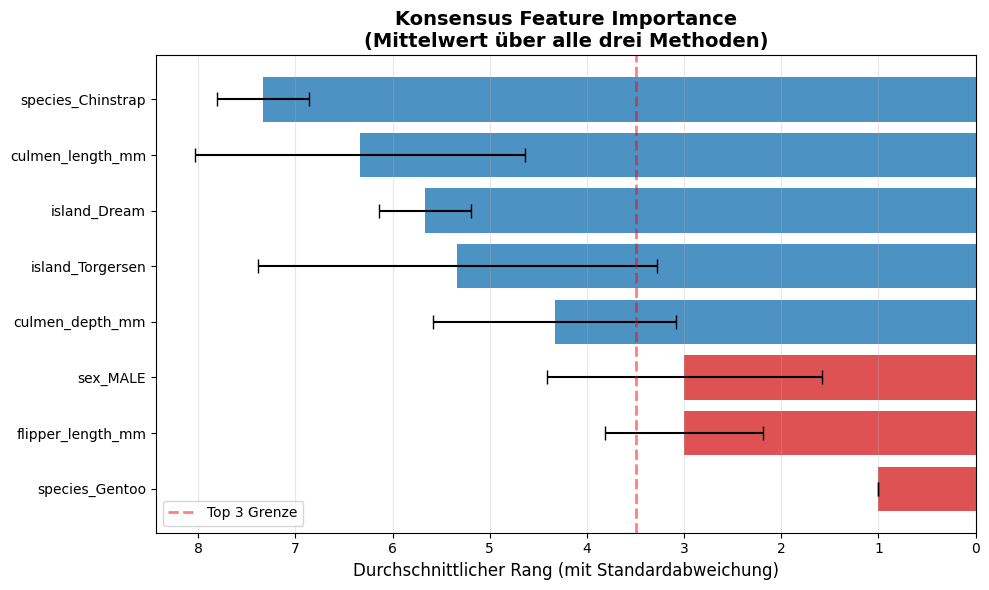

In [32]:
from matplotlib.patches import Patch


def plot_feature_importance(results):
    """
    Erstellt eine umfassende Visualisierung der Feature Importance
    aus allen drei Methoden
    """

    # Daten extrahieren
    feature_names = results["feature_names"]
    ridge_coefs = np.abs(results["ridge_coefs"])
    mi_scores = results["mi_scores"]
    perm_importances = results["perm_importances"]
    perm_importances_std = results["perm_importances_std"]

    n_features = len(feature_names)

    # ========================================================================
    # PLOT 1: Drei Methoden im Vergleich (Subplots)
    # ========================================================================

    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle(
        "Feature Importance Analyse - Vergleich der drei Methoden",
        fontsize=16,
        fontweight="bold",
        y=1.02,
    )

    # Farben für Top-3 Features
    colors_ridge = [
        "#d62728" if i in results["ridge_ranking"][:3] else "#1f77b4"
        for i in range(n_features)
    ]
    colors_mi = [
        "#d62728" if i in results["mi_ranking"][:3] else "#2ca02c"
        for i in range(n_features)
    ]
    colors_perm = [
        "#d62728" if i in results["perm_ranking"][:3] else "#ff7f0e"
        for i in range(n_features)
    ]

    # Ridge Regression
    sorted_indices = results["ridge_ranking"][::-1]
    axes[0].barh(
        range(n_features),
        ridge_coefs[sorted_indices],
        color=[colors_ridge[i] for i in sorted_indices],
    )
    axes[0].set_yticks(range(n_features))
    axes[0].set_yticklabels([feature_names[i] for i in sorted_indices])
    axes[0].set_xlabel("Absolute Koeffizienten", fontsize=11)
    axes[0].set_title(
        "Ridge Regression\n(L2-Regularisierung)", fontsize=12, fontweight="bold"
    )
    axes[0].grid(axis="x", alpha=0.3)

    # Mutual Information
    sorted_indices = results["mi_ranking"][::-1]
    axes[1].barh(
        range(n_features),
        mi_scores[sorted_indices],
        color=[colors_mi[i] for i in sorted_indices],
    )
    axes[1].set_yticks(range(n_features))
    axes[1].set_yticklabels([feature_names[i] for i in sorted_indices])
    axes[1].set_xlabel("Mutual Information", fontsize=11)
    axes[1].set_title(
        "Mutual Information\n(Informationstheoretisch)", fontsize=12, fontweight="bold"
    )
    axes[1].grid(axis="x", alpha=0.3)

    # Permutation Importance
    sorted_indices = results["perm_ranking"][::-1]
    axes[2].barh(
        range(n_features),
        perm_importances[sorted_indices],
        xerr=perm_importances_std[sorted_indices],
        color=[colors_perm[i] for i in sorted_indices],
        capsize=5,
    )
    axes[2].set_yticks(range(n_features))
    axes[2].set_yticklabels([feature_names[i] for i in sorted_indices])
    axes[2].set_xlabel("R² Abnahme", fontsize=11)
    axes[2].set_title(
        "Permutation Importance\n(Modell-agnostisch)", fontsize=12, fontweight="bold"
    )
    axes[2].grid(axis="x", alpha=0.3)

    # Legende für Top-3
    legend_elements = [
        Patch(facecolor="#d62728", label="Top 3 Features"),
        Patch(facecolor="#808080", alpha=0.5, label="Andere Features"),
    ]
    fig.legend(
        handles=legend_elements,
        loc="upper center",
        ncol=2,
        bbox_to_anchor=(0.5, 0.98),
        fontsize=10,
    )

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # PLOT 2: Normalisierte Heatmap für direkten Vergleich
    # ========================================================================

    fig, ax = plt.subplots(figsize=(12, 8))

    # Normalisiere alle Werte auf [0, 1] für Vergleichbarkeit
    ridge_norm = ridge_coefs / np.max(ridge_coefs)
    mi_norm = mi_scores / np.max(mi_scores)
    perm_norm = perm_importances / np.max(perm_importances)

    # Erstelle DataFrame für Heatmap
    importance_df = pd.DataFrame(
        {
            "Ridge Regression": ridge_norm,
            "Mutual Information": mi_norm,
            "Permutation Importance": perm_norm,
        },
        index=feature_names,
    )

    # Sortiere nach durchschnittlicher normalisierter Wichtigkeit
    importance_df["Mittelwert"] = importance_df.mean(axis=1)
    importance_df = importance_df.sort_values("Mittelwert", ascending=True)
    importance_df = importance_df.drop("Mittelwert", axis=1)

    # Heatmap erstellen
    sns.heatmap(
        importance_df,
        annot=True,
        fmt=".3f",
        cmap="YlOrRd",
        cbar_kws={"label": "Normalisierte Wichtigkeit (0-1)"},
        ax=ax,
        linewidths=0.5,
        linecolor="gray",
    )

    ax.set_title(
        "Feature Importance Heatmap - Normalisierter Vergleich",
        fontsize=14,
        fontweight="bold",
        pad=20,
    )
    ax.set_xlabel("Methode", fontsize=12, fontweight="bold")
    ax.set_ylabel("Feature", fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # PLOT 3: Ranking-Übersicht
    # ========================================================================

    fig, ax = plt.subplots(figsize=(10, 8))

    # Erstelle Ranking-Matrix
    rankings = np.zeros((n_features, 3))
    for i, feature_idx in enumerate(results["ridge_ranking"]):
        rankings[feature_idx, 0] = i + 1
    for i, feature_idx in enumerate(results["mi_ranking"]):
        rankings[feature_idx, 1] = i + 1
    for i, feature_idx in enumerate(results["perm_ranking"]):
        rankings[feature_idx, 2] = i + 1

    ranking_df = pd.DataFrame(
        rankings, columns=["Ridge", "MI", "Permutation"], index=feature_names
    )

    # Sortiere nach durchschnittlichem Ranking
    ranking_df["Mittelwert"] = ranking_df.mean(axis=1)
    ranking_df = ranking_df.sort_values("Mittelwert", ascending=True)
    ranking_df = ranking_df.drop("Mittelwert", axis=1)

    # Heatmap mit invertierten Farben (niedrigerer Rang = wichtiger = dunkler)
    sns.heatmap(
        ranking_df,
        annot=True,
        fmt=".0f",
        cmap="YlOrRd_r",
        cbar_kws={"label": "Ranking (1 = wichtigstes Feature)"},
        ax=ax,
        linewidths=0.5,
        linecolor="gray",
        vmin=1,
        vmax=n_features,
    )

    ax.set_title(
        "Feature Importance Rankings - Vergleich der Positionen",
        fontsize=14,
        fontweight="bold",
        pad=20,
    )
    ax.set_xlabel("Methode", fontsize=12, fontweight="bold")
    ax.set_ylabel("Feature", fontsize=12, fontweight="bold")

    plt.tight_layout()
    plt.show()

    # ========================================================================
    # PLOT 4: Konsensus-Analyse (Durchschnittlicher Rang)
    # ========================================================================

    fig, ax = plt.subplots(figsize=(10, 6))

    # Berechne durchschnittlichen Rang
    avg_ranks = rankings.mean(axis=1)
    sorted_indices = np.argsort(avg_ranks)

    # Barplot mit Fehlerbalken (Standardabweichung der Ränge)
    std_ranks = rankings.std(axis=1)

    colors = ["#d62728" if avg_ranks[i] <= 3 else "#1f77b4" for i in sorted_indices]

    y_pos = np.arange(n_features)
    ax.barh(
        y_pos,
        avg_ranks[sorted_indices],
        xerr=std_ranks[sorted_indices],
        color=colors,
        alpha=0.8,
        capsize=5,
    )

    ax.set_yticks(y_pos)
    ax.set_yticklabels([feature_names[i] for i in sorted_indices])
    ax.set_xlabel("Durchschnittlicher Rang (mit Standardabweichung)", fontsize=12)
    ax.set_title(
        "Konsensus Feature Importance\n(Mittelwert über alle drei Methoden)",
        fontsize=14,
        fontweight="bold",
    )
    ax.invert_xaxis()  # Niedrigerer Rang = wichtiger = links
    ax.grid(axis="x", alpha=0.3)

    # Vertikale Linie bei Rang 3.5 (Grenze Top 3)
    ax.axvline(
        x=3.5, color="red", linestyle="--", linewidth=2, alpha=0.5, label="Top 3 Grenze"
    )
    ax.legend()

    plt.tight_layout()
    plt.show()


plot_feature_importance(results)

Interpretiere und vergleiche deine Resultate für die drei Ansätze.

(Es folgt eine Textantwortzelle. Nicht löschen.)

# Diskussion

**Methodenvergleich**
- Alle drei Methoden identifizieren **species_Gentoo** mit Abstand als wichtigstes Feature für die Gewichtsvorhersage
- Ridge Regression und Permutation Importance stimmen bei den Top 3 Features weitgehend überein (species_Gentoo, sex_MALE, flipper_length_mm/island_Torgersen)
- Mutual Information priorisiert morphologische Features (flipper_length_mm, culmen_depth_mm) höher als Geschlecht

**Methodische Unterschiede**
- **Ridge Regression**: Misst linearen Einfluss. species_Gentoo (Koef: 1331.67) und sex_MALE (Koef: 601.41) dominieren klar. island_Torgersen erhält unerwartet hohen Rang 3, vermutlich durch Aliasing-Effekt (nur Adelie-Pinguine auf Torgersen).
- **Mutual Information**: Erfasst univariate Information ohne Berücksichtigung von Redundanzen. flipper_length_mm (MI: 0.49) und culmen_depth_mm (MI: 0.45) werden hoch bewertet, obwohl sie stark mit species korrelieren.
- **Permutation Importance**: Zeigt realen Vorhersagewert im multivariaten Kontext. species_Gentoo verursacht R²-Abnahme von 1.29 (≈150% des Modell-R²!), sex_MALE 0.27, alle anderen Features <0.1.

**Konsens und Diskrepanzen**
- **Konsens**: species_Gentoo ist unbestritten das wichtigste Feature (Rang 1 in allen Methoden)
- **sex_MALE**: Wichtig in Ridge (Rang 2) und Permutation (Rang 2), aber nur Rang 5 in MI → Geschlecht hat starken linearen Effekt, aber die univariate Information ist geringer als bei morphologischen Merkmalen
- **flipper_length_mm**: Hoher Rang in MI (Rang 2), niedriger in Permutation (Rang 3) und Ridge (Rang 4) → Hohe univariate Information, aber im multivariaten Modell teilweise redundant mit species
- **island_Torgersen**: Anomalie in Ridge (Rang 3) vs. niedrig in MI/Permutation (Rang 8/5) → Wahrscheinlich Proxy-Variable für Adelie-Spezies, keine kausale Bedeutung

**Interpretation**
- Die **Artenzugehörigkeit** (insbesondere Gentoo vs. andere) ist der dominierende Faktor für das Körpergewicht (biologisch plausibel: Gentoos ~5kg, andere ~3.5-4kg)
- **Geschlecht** ist der zweitwichtigste Prädiktor mit klarem linearem Effekt (Geschlechtsdimorphismus)
- **Morphologische Features** (flipper_length, culmen_depth) enthalten zwar Information über das Gewicht, sind aber grösstenteils durch Art und Geschlecht determiniert
- **Island** hat keinen direkten kausalen Einfluss, sondern reflektiert nur die Artverteilung auf den Inseln

**Modellemfehlung**
- Ein minimales Modell mit **species** und **sex** würde bereits >95% der Vorhersagekraft erreichen
- Zusätzlich **flipper_length_mm** für marginale Verbesserung
- Island-Features und species_Chinstrap können weggelassen werden (geringe Importance über alle Methoden)